In [ ]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [2]:
from starccato_flow.data.toy_data import ToyData
from starccato_flow.data.ccsn_data import CCSNData
from starccato_flow.training.trainer import Trainer

/Users/tarineccleston/Desktop/starccato/starccato-flow/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/tarineccleston/Desktop/starccato/starccato-flow/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from starccato_flow.utils.defaults import DEVICE

### Dataset

In [4]:
# train_dataset = ToyData(num_signals=1684, signal_length=256)
# validation_dataset = ToyData(num_signals=round(1684 * 0.1), signal_length=256)

### Dataset Plots

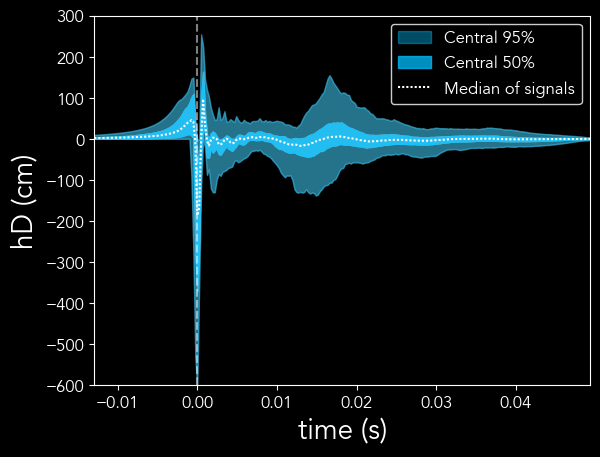

In [ ]:
ccsn_dataset = CCSNData()
ccsn_dataset.plot_signal_distribution(background="black", font_family="sans-serif", font_name="Avenir", fname="plots/ccsn_signal_distribution.svg")

In [ ]:
def plot_waveform_grid(
    signals: np.ndarray,
    max_value: float,
    num_cols: int = 2,
    num_rows: int = 4,
    fname: str = None,
) -> Tuple[plt.Figure, plt.Axes]:
    fig, axes = plt.subplots(
        num_rows, num_cols, figsize=(10, 15)
    )

    axes = axes.flatten()

    # plot each signal on a separate subplot
    for i, ax in enumerate(axes):
        d = [i / 4096 for i in range(0, 256)]
        d = [value - (53 / 4096) for value in d]
        y = signals[i].flatten()
        y = y * max_value
        ax.set_ylim(-600, 300)
        ax.plot(d, y, color="red")

        ax.axvline(x=0, color="black", linestyle="--", alpha=0.5)
        ax.grid(True)

        # remove y-axis ticks for the right-hand column
        if i % num_cols == num_cols - 1:
            ax.yaxis.set_ticklabels([])

        # remove x-axis tick labels for all but the bottom two plots
        if i < num_cols * (num_rows - 1):
            ax.xaxis.set_ticklabels([])

    # for i in range(512, 8 * 4):
    #     fig.delaxes(axes[i])

    fig.supxlabel('time (s)', fontsize=32)
    fig.supylabel('hD (cm)', fontsize=32)

    plt.tight_layout()
    if fname:
        plt.savefig(fname, dpi=300, bbox_inches="tight")

    plt.show()
    return fig, axes



In [6]:
toy=False

### Train VAE + Flow

Epochs:   0%|          | 1/256 [00:01<08:11,  1.93s/it]

Epoch 1/256 | Train Loss: 143.9138 | Val Loss: 112.4200


Epochs:   1%|          | 2/256 [00:03<07:19,  1.73s/it]

Epoch 2/256 | Train Loss: 96.0996 | Val Loss: 86.0096


Epochs:   1%|          | 3/256 [00:05<06:59,  1.66s/it]

Epoch 3/256 | Train Loss: 75.4843 | Val Loss: 67.3707


Epochs:   2%|▏         | 4/256 [00:06<06:55,  1.65s/it]

Epoch 4/256 | Train Loss: 64.9066 | Val Loss: 61.3722


Epochs:   2%|▏         | 5/256 [00:08<07:01,  1.68s/it]

Epoch 5/256 | Train Loss: 59.9656 | Val Loss: 56.7727


Epochs:   2%|▏         | 6/256 [00:10<07:22,  1.77s/it]

Epoch 6/256 | Train Loss: 55.9286 | Val Loss: 52.8552


Epochs:   3%|▎         | 7/256 [00:12<07:14,  1.75s/it]

Epoch 7/256 | Train Loss: 52.6077 | Val Loss: 50.0021


Epochs:   3%|▎         | 8/256 [00:13<07:10,  1.73s/it]

Epoch 8/256 | Train Loss: 48.4003 | Val Loss: 46.8188


Epochs:   4%|▎         | 9/256 [00:15<07:07,  1.73s/it]

Epoch 9/256 | Train Loss: 46.8883 | Val Loss: 45.4103


Epochs:   4%|▍         | 10/256 [00:17<07:06,  1.73s/it]

Epoch 10/256 | Train Loss: 44.7400 | Val Loss: 43.6532


Epochs:   4%|▍         | 11/256 [00:19<07:11,  1.76s/it]

Epoch 11/256 | Train Loss: 43.2159 | Val Loss: 43.5197


Epochs:   5%|▍         | 12/256 [00:20<07:08,  1.76s/it]

Epoch 12/256 | Train Loss: 43.0024 | Val Loss: 42.0527


Epochs:   5%|▌         | 13/256 [00:22<06:57,  1.72s/it]

Epoch 13/256 | Train Loss: 41.4099 | Val Loss: 41.2532


Epochs:   5%|▌         | 14/256 [00:24<06:44,  1.67s/it]

Epoch 14/256 | Train Loss: 40.7285 | Val Loss: 39.4783


Epochs:   6%|▌         | 15/256 [00:25<06:40,  1.66s/it]

Epoch 15/256 | Train Loss: 40.6905 | Val Loss: 42.2541
Epoch 16/256 | Train Loss: 40.2521 | Val Loss: 38.7255


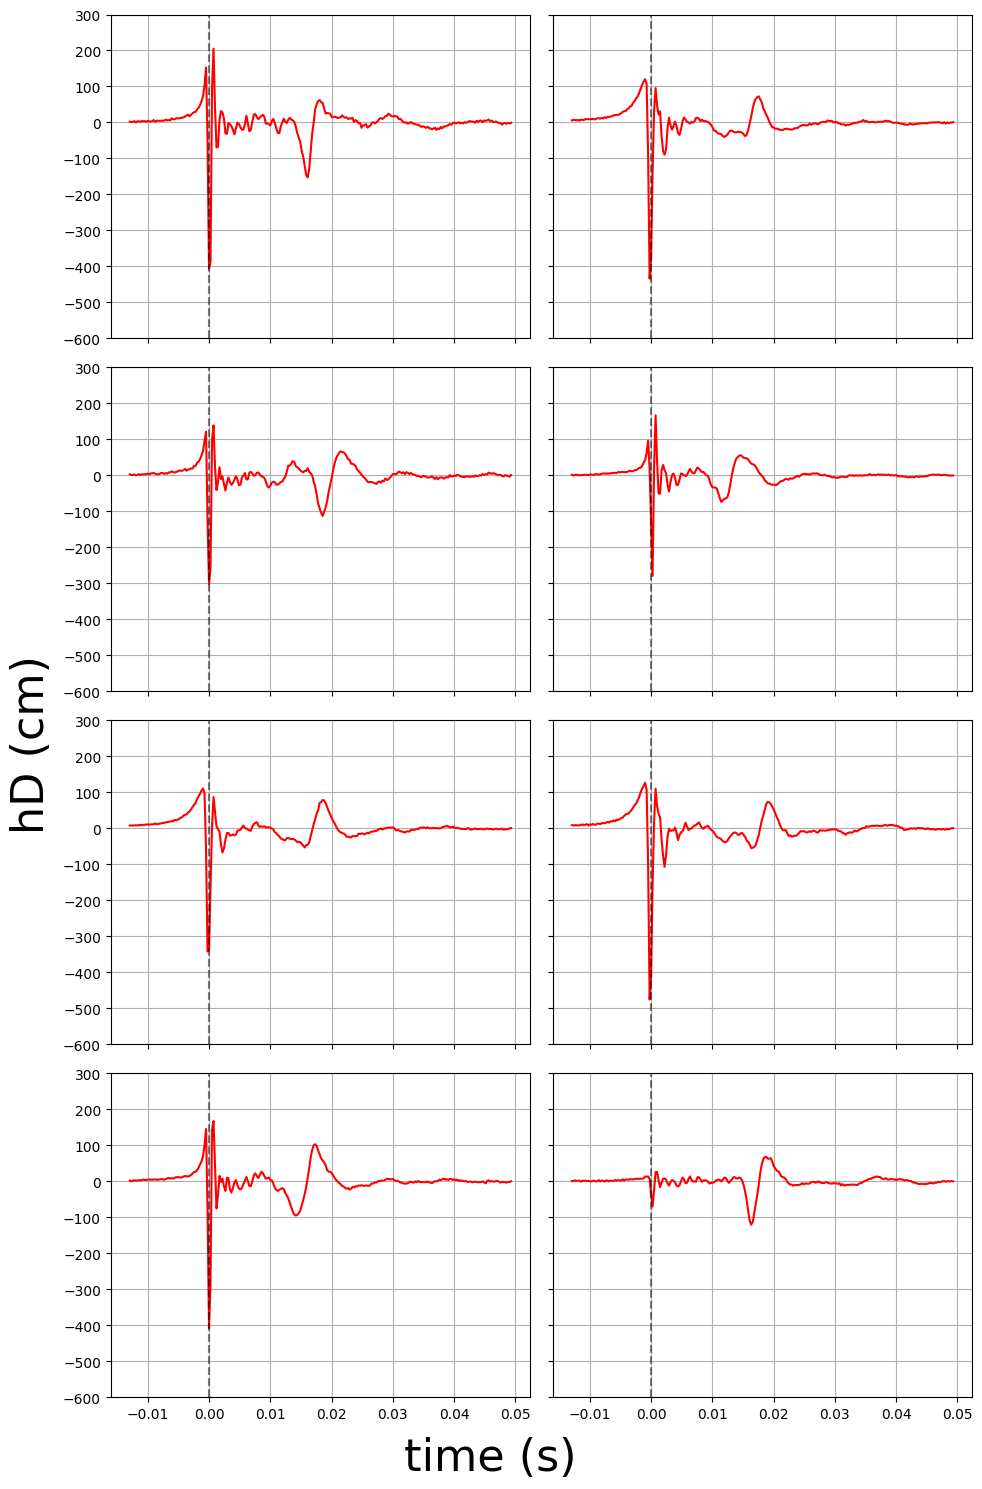

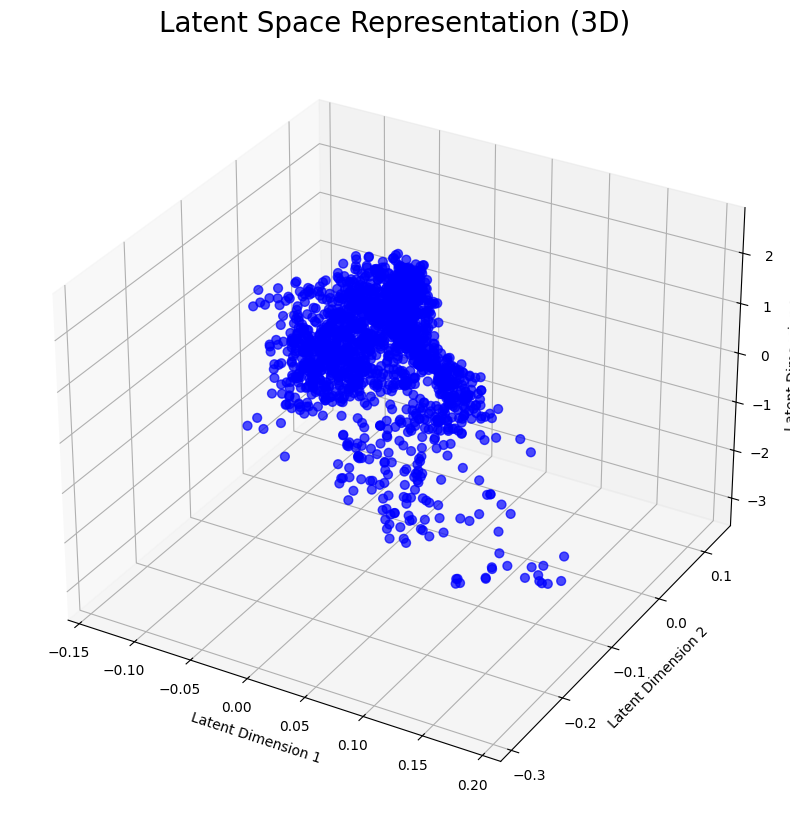

Epochs:   7%|▋         | 17/256 [00:29<07:17,  1.83s/it]

Epoch 17/256 | Train Loss: 39.3685 | Val Loss: 38.1180


Epochs:   7%|▋         | 18/256 [00:31<06:56,  1.75s/it]

Epoch 18/256 | Train Loss: 38.9412 | Val Loss: 38.8571


Epochs:   7%|▋         | 19/256 [00:32<06:40,  1.69s/it]

Epoch 19/256 | Train Loss: 38.8850 | Val Loss: 39.0551


Epochs:   8%|▊         | 20/256 [00:34<06:30,  1.66s/it]

Epoch 20/256 | Train Loss: 38.6899 | Val Loss: 38.8956


Epochs:   8%|▊         | 21/256 [00:36<06:21,  1.63s/it]

Epoch 21/256 | Train Loss: 38.5049 | Val Loss: 38.9727


Epochs:   9%|▊         | 22/256 [00:37<06:16,  1.61s/it]

Epoch 22/256 | Train Loss: 38.0576 | Val Loss: 37.0169


Epochs:   9%|▉         | 23/256 [00:39<06:11,  1.59s/it]

Epoch 23/256 | Train Loss: 37.8227 | Val Loss: 36.8104


Epochs:   9%|▉         | 24/256 [00:40<06:07,  1.58s/it]

Epoch 24/256 | Train Loss: 37.6268 | Val Loss: 36.7612


Epochs:  10%|▉         | 25/256 [00:42<06:05,  1.58s/it]

Epoch 25/256 | Train Loss: 37.0063 | Val Loss: 37.0569


Epochs:  10%|█         | 26/256 [00:43<06:02,  1.57s/it]

Epoch 26/256 | Train Loss: 36.7774 | Val Loss: 36.1706


Epochs:  11%|█         | 27/256 [00:45<06:02,  1.58s/it]

Epoch 27/256 | Train Loss: 36.5976 | Val Loss: 35.5210


Epochs:  11%|█         | 28/256 [00:47<06:15,  1.64s/it]

Epoch 28/256 | Train Loss: 37.0965 | Val Loss: 36.4214


Epochs:  11%|█▏        | 29/256 [00:48<06:12,  1.64s/it]

Epoch 29/256 | Train Loss: 36.7398 | Val Loss: 36.4776


Epochs:  12%|█▏        | 30/256 [00:50<06:10,  1.64s/it]

Epoch 30/256 | Train Loss: 36.3875 | Val Loss: 34.9788


Epochs:  12%|█▏        | 31/256 [00:52<06:02,  1.61s/it]

Epoch 31/256 | Train Loss: 35.6966 | Val Loss: 34.9856
Epoch 32/256 | Train Loss: 35.9977 | Val Loss: 35.0067


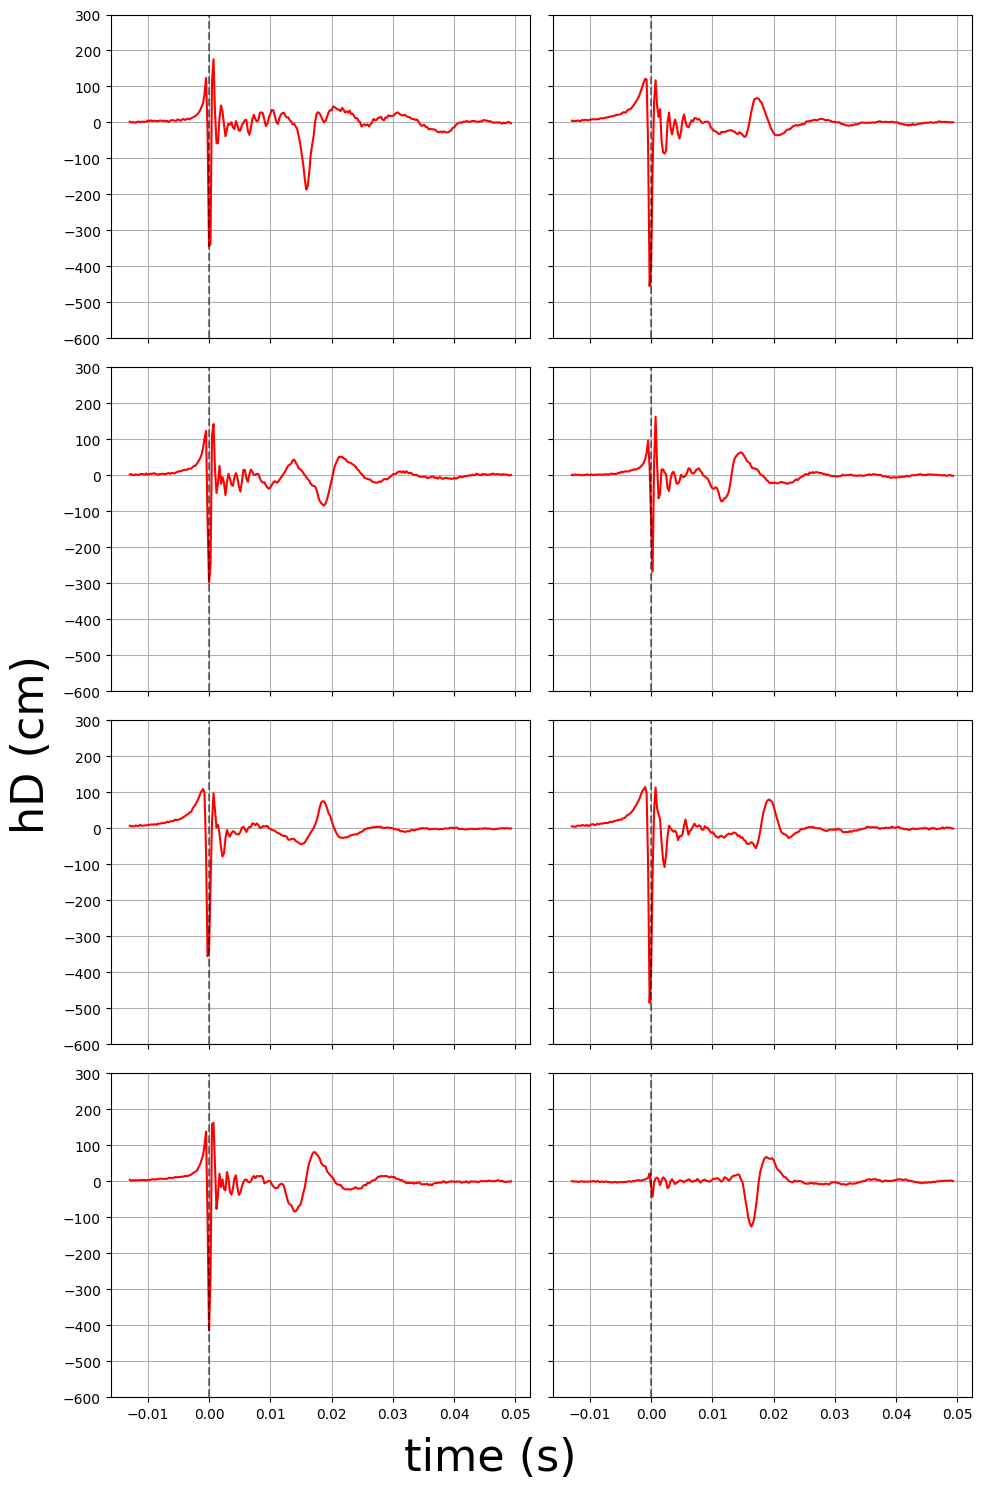

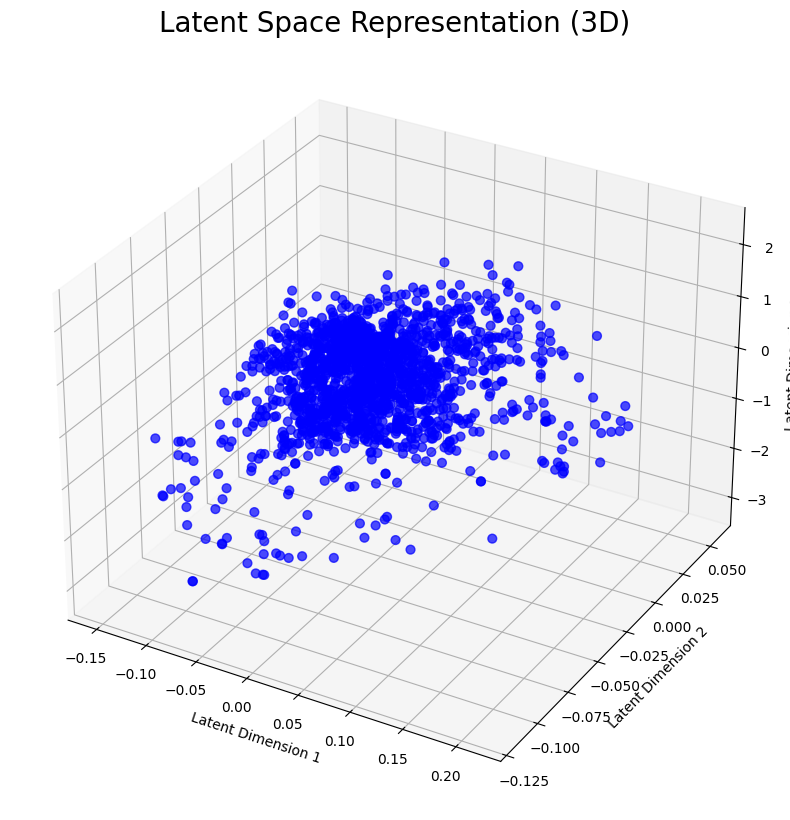

Epochs:  13%|█▎        | 33/256 [00:56<06:37,  1.78s/it]

Epoch 33/256 | Train Loss: 35.7071 | Val Loss: 35.0836


Epochs:  13%|█▎        | 34/256 [00:57<06:20,  1.71s/it]

Epoch 34/256 | Train Loss: 35.0114 | Val Loss: 34.9126


Epochs:  14%|█▎        | 35/256 [00:59<06:07,  1.66s/it]

Epoch 35/256 | Train Loss: 35.2860 | Val Loss: 35.1756


Epochs:  14%|█▍        | 36/256 [01:00<05:58,  1.63s/it]

Epoch 36/256 | Train Loss: 35.4701 | Val Loss: 34.7493


Epochs:  14%|█▍        | 37/256 [01:02<05:52,  1.61s/it]

Epoch 37/256 | Train Loss: 35.4035 | Val Loss: 34.9394


Epochs:  15%|█▍        | 38/256 [01:04<06:05,  1.68s/it]

Epoch 38/256 | Train Loss: 34.9370 | Val Loss: 34.7010


Epochs:  15%|█▌        | 39/256 [01:05<06:01,  1.67s/it]

Epoch 39/256 | Train Loss: 34.7169 | Val Loss: 34.0001


Epochs:  16%|█▌        | 40/256 [01:07<05:53,  1.64s/it]

Epoch 40/256 | Train Loss: 34.4021 | Val Loss: 34.6079


Epochs:  16%|█▌        | 41/256 [01:09<05:49,  1.63s/it]

Epoch 41/256 | Train Loss: 34.5714 | Val Loss: 33.8065


Epochs:  16%|█▋        | 42/256 [01:10<06:07,  1.72s/it]

Epoch 42/256 | Train Loss: 34.2035 | Val Loss: 34.1626


Epochs:  17%|█▋        | 43/256 [01:12<06:09,  1.73s/it]

Epoch 43/256 | Train Loss: 34.4146 | Val Loss: 34.7012


Epochs:  17%|█▋        | 44/256 [01:14<05:55,  1.68s/it]

Epoch 44/256 | Train Loss: 34.5526 | Val Loss: 34.2327


Epochs:  18%|█▊        | 45/256 [01:15<05:48,  1.65s/it]

Epoch 45/256 | Train Loss: 34.2620 | Val Loss: 33.3376


Epochs:  18%|█▊        | 46/256 [01:17<06:09,  1.76s/it]

Epoch 46/256 | Train Loss: 33.9426 | Val Loss: 33.1425


Epochs:  18%|█▊        | 47/256 [01:19<06:00,  1.73s/it]

Epoch 47/256 | Train Loss: 34.2072 | Val Loss: 33.8480
Epoch 48/256 | Train Loss: 33.7899 | Val Loss: 34.1121


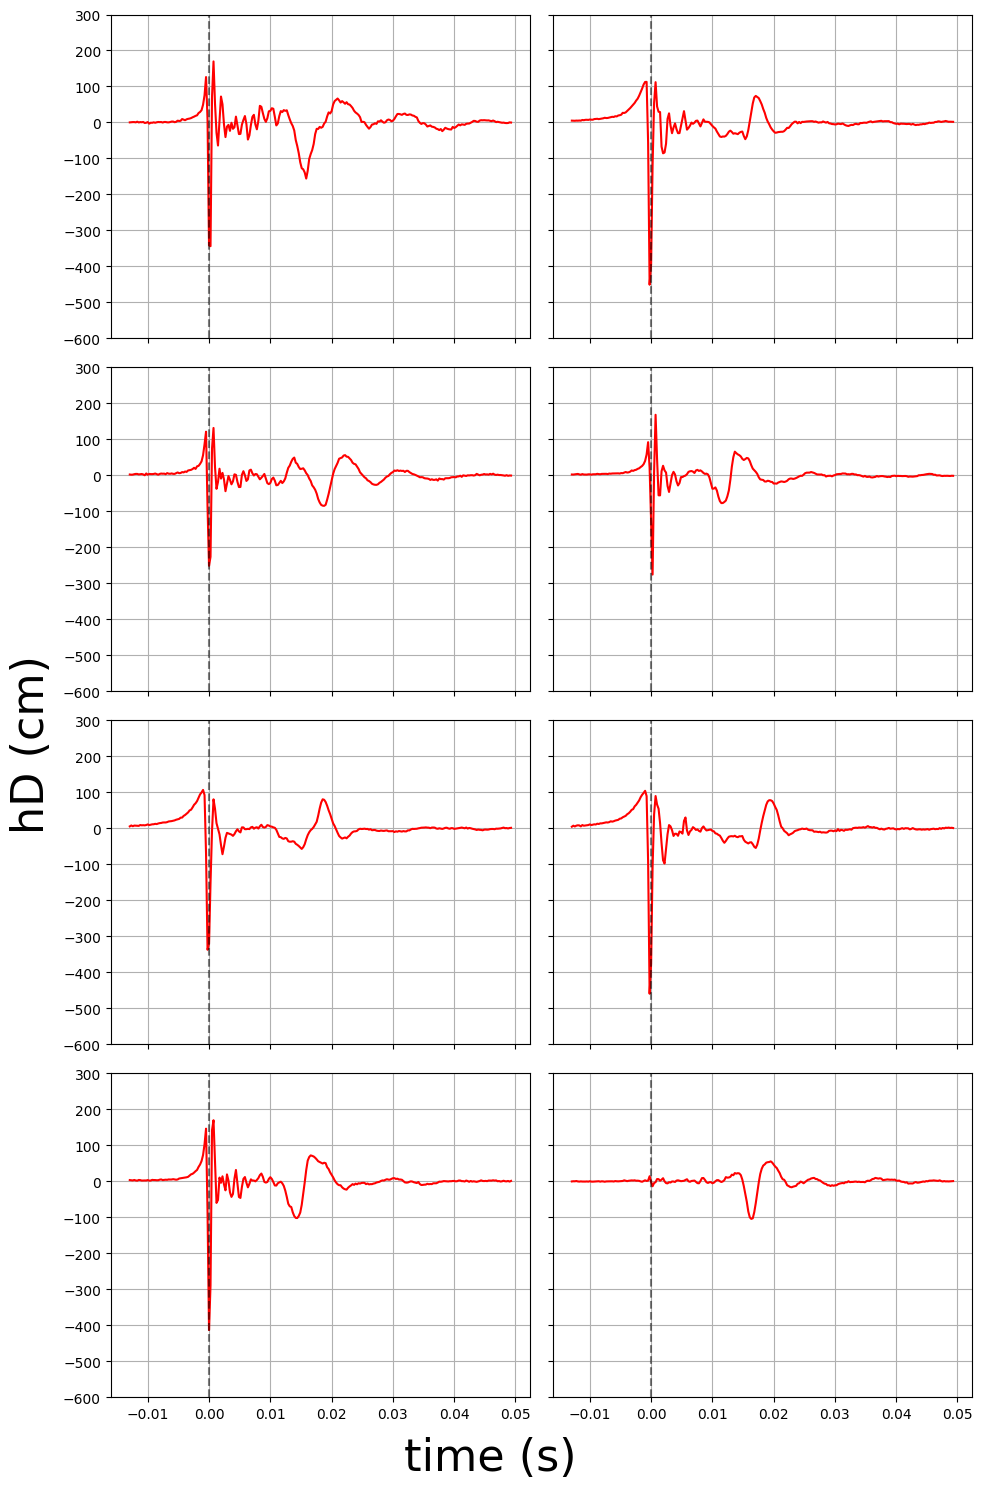

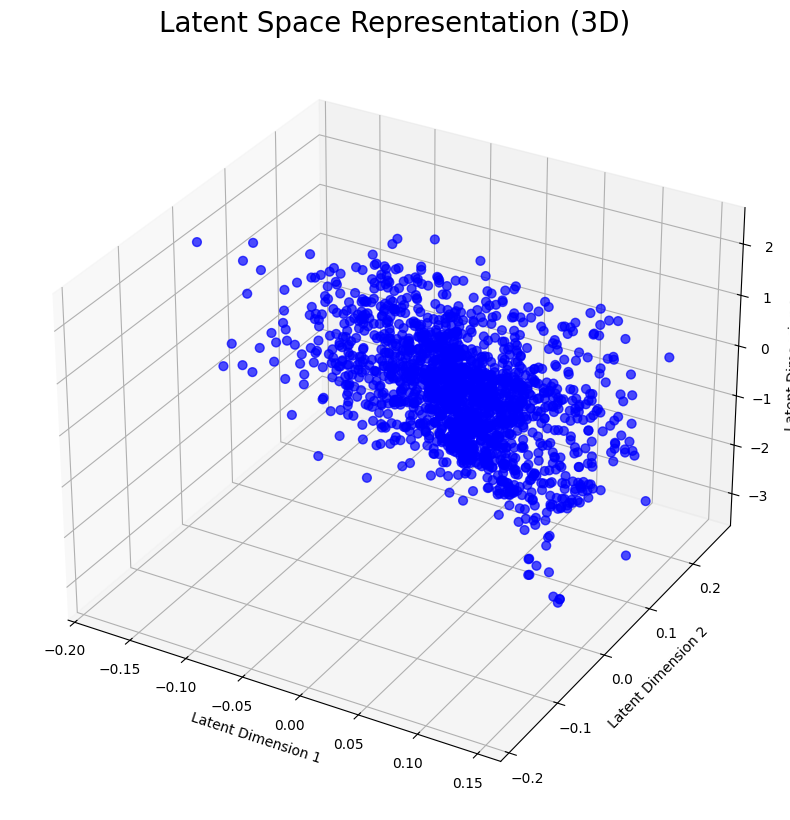

Epochs:  19%|█▉        | 49/256 [01:24<06:47,  1.97s/it]

Epoch 49/256 | Train Loss: 34.1418 | Val Loss: 33.2731


Epochs:  20%|█▉        | 50/256 [01:25<06:21,  1.85s/it]

Epoch 50/256 | Train Loss: 33.5649 | Val Loss: 33.2787


Epochs:  20%|█▉        | 51/256 [01:27<06:03,  1.77s/it]

Epoch 51/256 | Train Loss: 33.5869 | Val Loss: 33.8175


Epochs:  20%|██        | 52/256 [01:28<05:49,  1.71s/it]

Epoch 52/256 | Train Loss: 33.6152 | Val Loss: 33.5594


Epochs:  21%|██        | 53/256 [01:30<05:44,  1.70s/it]

Epoch 53/256 | Train Loss: 33.9119 | Val Loss: 32.3068


Epochs:  21%|██        | 54/256 [01:32<05:34,  1.66s/it]

Epoch 54/256 | Train Loss: 33.5685 | Val Loss: 33.5421


Epochs:  21%|██▏       | 55/256 [01:33<05:28,  1.63s/it]

Epoch 55/256 | Train Loss: 33.1990 | Val Loss: 32.6265


Epochs:  22%|██▏       | 56/256 [01:35<05:44,  1.72s/it]

Epoch 56/256 | Train Loss: 33.1497 | Val Loss: 32.3566


Epochs:  22%|██▏       | 57/256 [01:37<05:36,  1.69s/it]

Epoch 57/256 | Train Loss: 33.2085 | Val Loss: 33.3523


Epochs:  23%|██▎       | 58/256 [01:38<05:32,  1.68s/it]

Epoch 58/256 | Train Loss: 33.2483 | Val Loss: 32.0772


Epochs:  23%|██▎       | 59/256 [01:40<05:22,  1.64s/it]

Epoch 59/256 | Train Loss: 33.1643 | Val Loss: 32.1143


Epochs:  23%|██▎       | 60/256 [01:42<05:18,  1.63s/it]

Epoch 60/256 | Train Loss: 32.7081 | Val Loss: 32.7959


Epochs:  24%|██▍       | 61/256 [01:43<05:14,  1.62s/it]

Epoch 61/256 | Train Loss: 32.8496 | Val Loss: 32.2536


Epochs:  24%|██▍       | 62/256 [01:45<05:24,  1.67s/it]

Epoch 62/256 | Train Loss: 32.4001 | Val Loss: 32.6061


Epochs:  25%|██▍       | 63/256 [01:47<05:30,  1.71s/it]

Epoch 63/256 | Train Loss: 32.4612 | Val Loss: 31.9519
Epoch 64/256 | Train Loss: 32.3230 | Val Loss: 32.5331


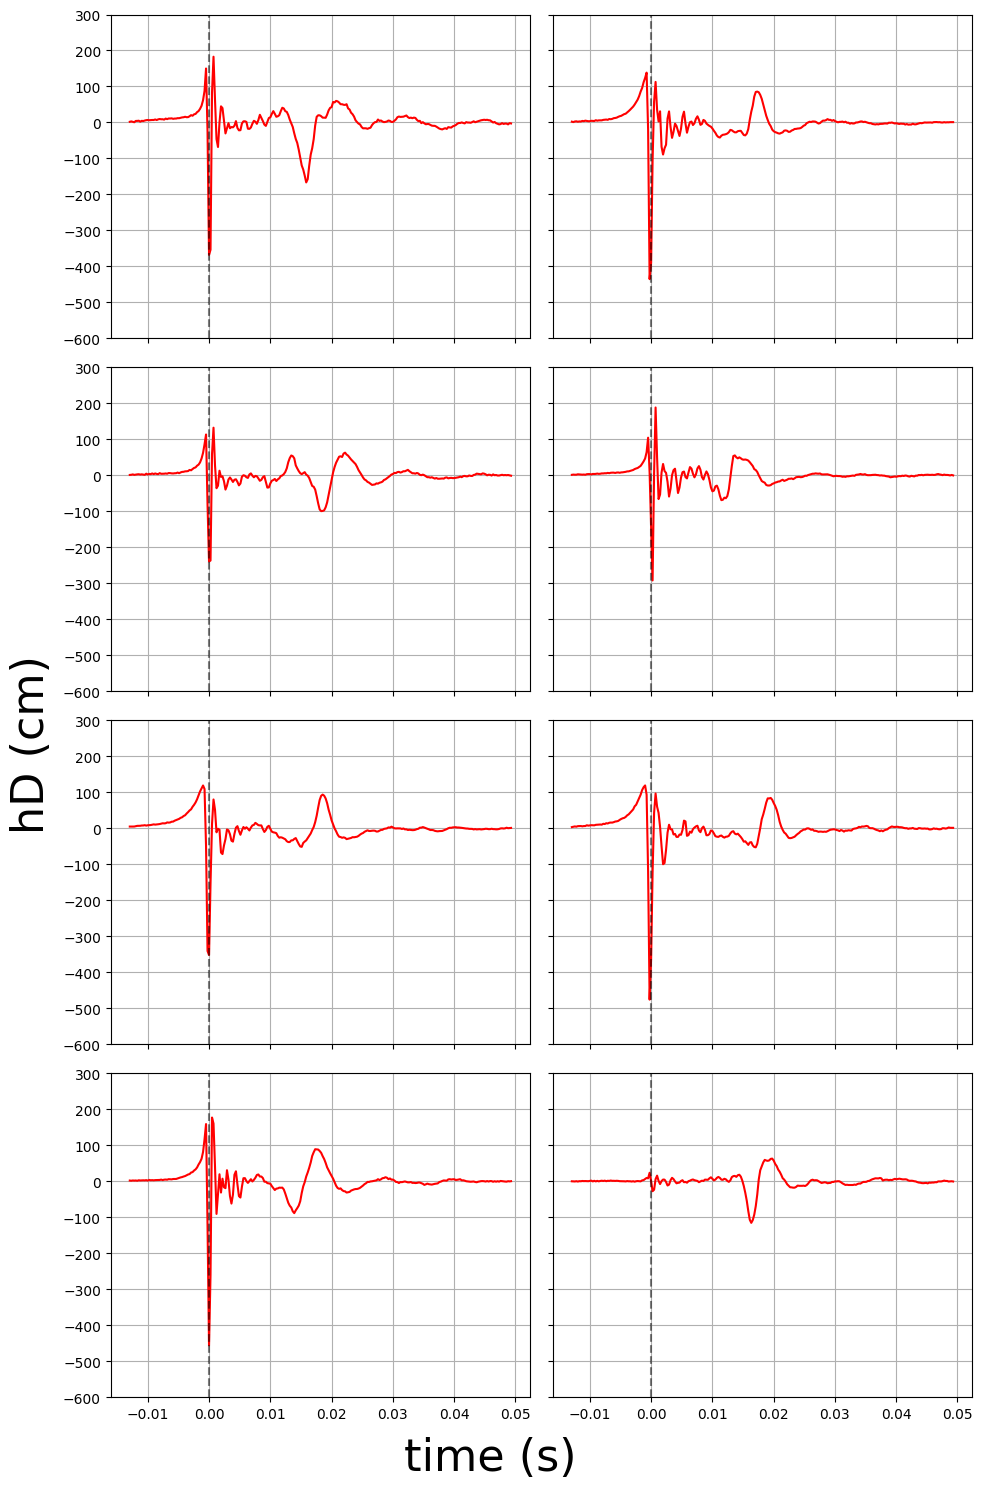

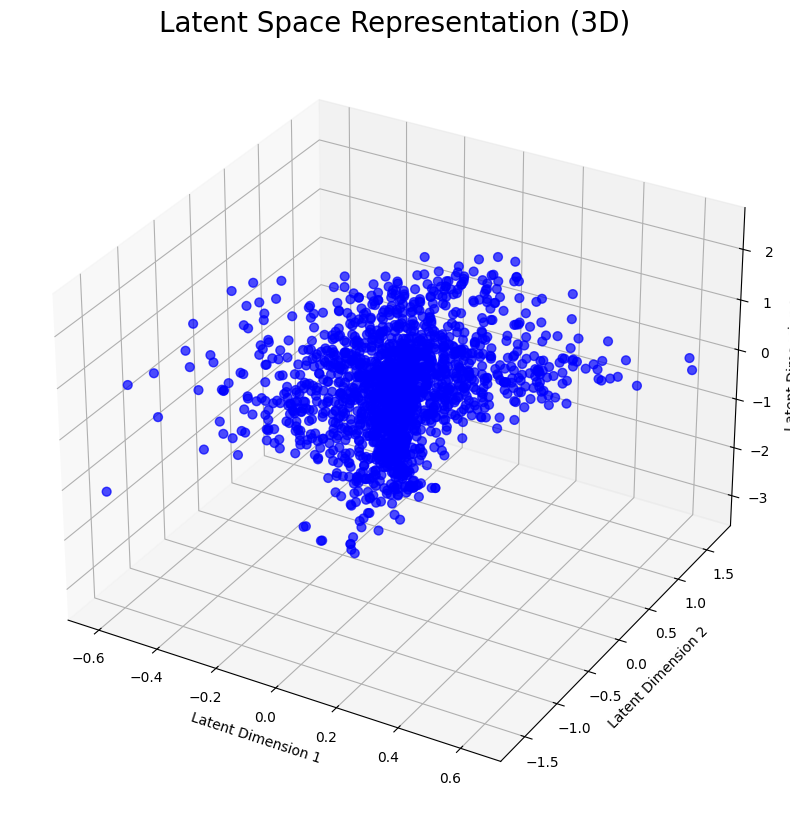

Epochs:  25%|██▌       | 65/256 [01:52<06:52,  2.16s/it]

Epoch 65/256 | Train Loss: 32.5403 | Val Loss: 32.5968


Epochs:  26%|██▌       | 66/256 [01:54<06:25,  2.03s/it]

Epoch 66/256 | Train Loss: 32.8899 | Val Loss: 31.8812


Epochs:  26%|██▌       | 67/256 [01:55<06:02,  1.92s/it]

Epoch 67/256 | Train Loss: 32.1348 | Val Loss: 32.0820


Epochs:  27%|██▋       | 68/256 [01:57<05:58,  1.91s/it]

Epoch 68/256 | Train Loss: 31.6782 | Val Loss: 31.6363


Epochs:  27%|██▋       | 69/256 [02:00<06:27,  2.07s/it]

Epoch 69/256 | Train Loss: 32.1486 | Val Loss: 32.1562


Epochs:  27%|██▋       | 70/256 [02:01<06:05,  1.97s/it]

Epoch 70/256 | Train Loss: 32.1486 | Val Loss: 31.5943


Epochs:  28%|██▊       | 71/256 [02:03<05:47,  1.88s/it]

Epoch 71/256 | Train Loss: 31.7184 | Val Loss: 31.8556


Epochs:  28%|██▊       | 72/256 [02:05<05:44,  1.87s/it]

Epoch 72/256 | Train Loss: 31.4975 | Val Loss: 31.1118


Epochs:  29%|██▊       | 73/256 [02:07<05:35,  1.84s/it]

Epoch 73/256 | Train Loss: 31.6847 | Val Loss: 31.3868


Epochs:  29%|██▉       | 74/256 [02:08<05:29,  1.81s/it]

Epoch 74/256 | Train Loss: 31.4181 | Val Loss: 30.3333


Epochs:  29%|██▉       | 75/256 [02:10<05:22,  1.78s/it]

Epoch 75/256 | Train Loss: 31.5823 | Val Loss: 31.0862


Epochs:  30%|██▉       | 76/256 [02:12<05:38,  1.88s/it]

Epoch 76/256 | Train Loss: 31.4130 | Val Loss: 31.2806


Epochs:  30%|███       | 77/256 [02:14<05:30,  1.85s/it]

Epoch 77/256 | Train Loss: 31.0242 | Val Loss: 31.6416


Epochs:  30%|███       | 78/256 [02:16<05:17,  1.78s/it]

Epoch 78/256 | Train Loss: 31.3824 | Val Loss: 30.9859


Epochs:  31%|███       | 79/256 [02:17<05:08,  1.74s/it]

Epoch 79/256 | Train Loss: 31.2664 | Val Loss: 30.6819
Epoch 80/256 | Train Loss: 31.0953 | Val Loss: 30.3278


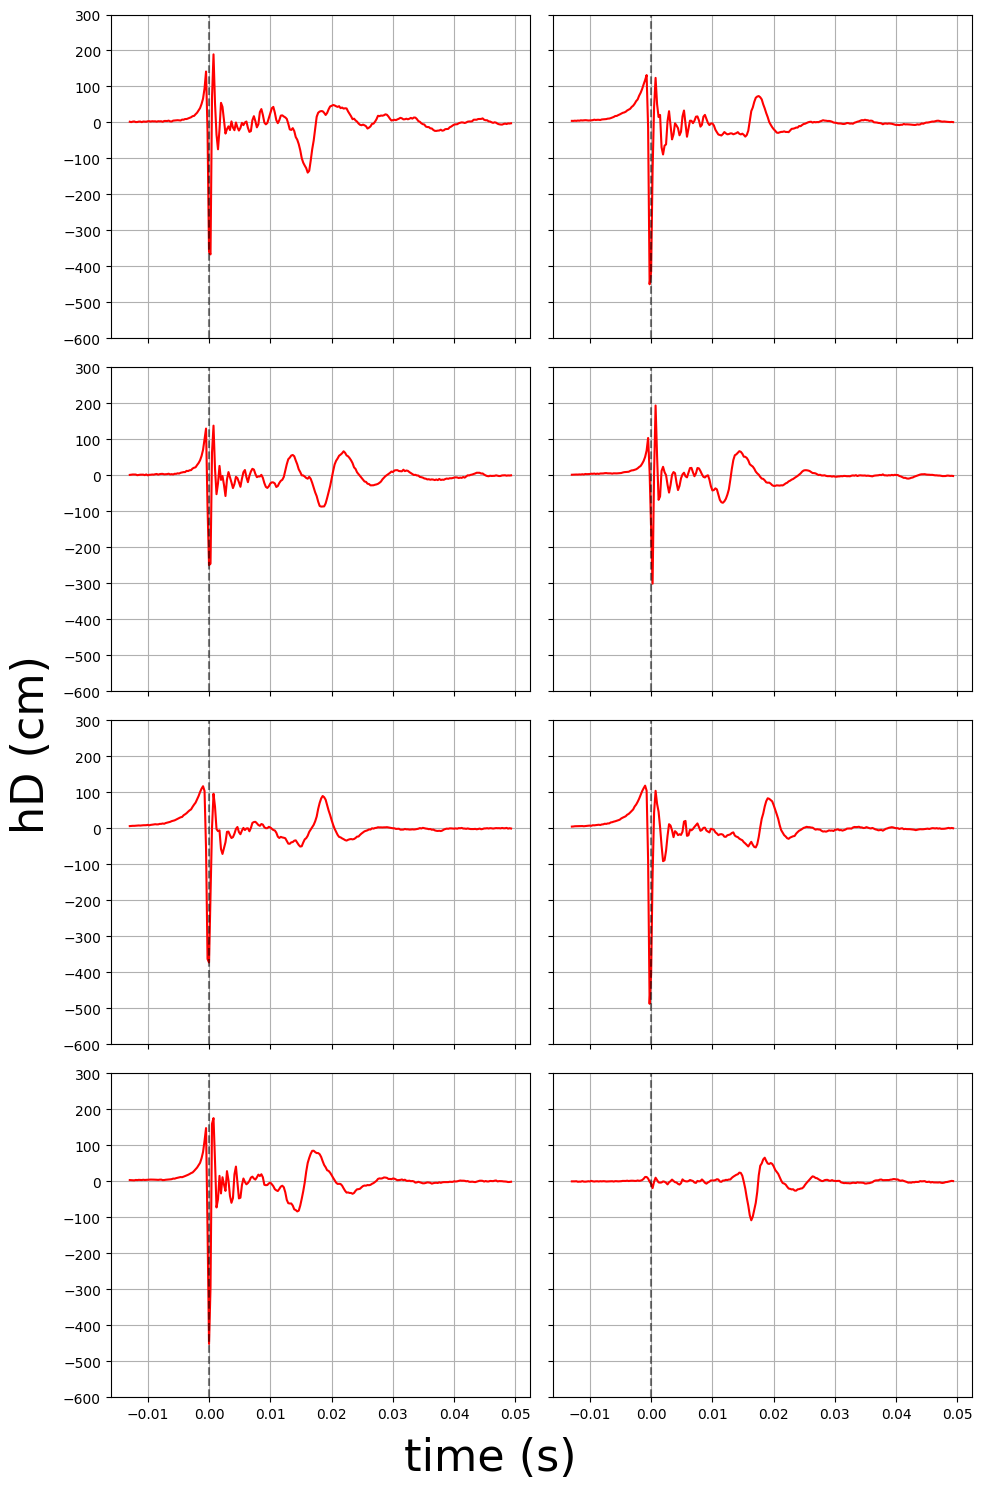

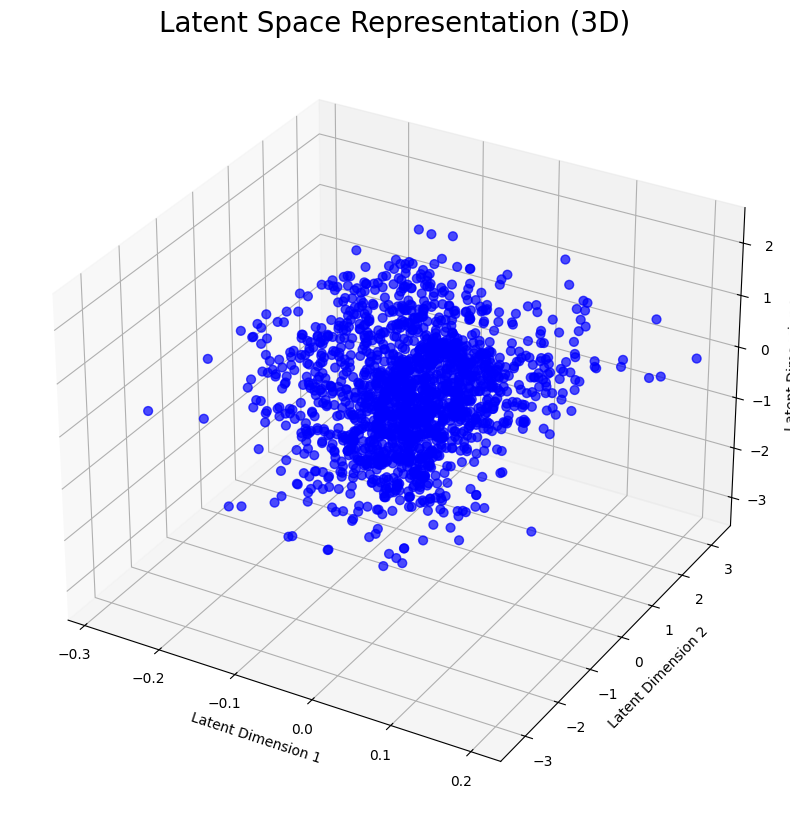

Epochs:  32%|███▏      | 81/256 [02:22<06:04,  2.08s/it]

Epoch 81/256 | Train Loss: 30.8392 | Val Loss: 30.5931


Epochs:  32%|███▏      | 82/256 [02:24<05:42,  1.97s/it]

Epoch 82/256 | Train Loss: 30.4210 | Val Loss: 30.4572


Epochs:  32%|███▏      | 83/256 [02:26<05:33,  1.93s/it]

Epoch 83/256 | Train Loss: 30.6978 | Val Loss: 29.6785


Epochs:  33%|███▎      | 84/256 [02:28<05:23,  1.88s/it]

Epoch 84/256 | Train Loss: 30.2372 | Val Loss: 29.6915


Epochs:  33%|███▎      | 85/256 [02:29<05:09,  1.81s/it]

Epoch 85/256 | Train Loss: 30.7681 | Val Loss: 30.4065


Epochs:  34%|███▎      | 86/256 [02:31<04:57,  1.75s/it]

Epoch 86/256 | Train Loss: 30.3617 | Val Loss: 29.5886


Epochs:  34%|███▍      | 87/256 [02:33<04:52,  1.73s/it]

Epoch 87/256 | Train Loss: 30.4556 | Val Loss: 30.2227


Epochs:  34%|███▍      | 88/256 [02:34<04:45,  1.70s/it]

Epoch 88/256 | Train Loss: 30.4802 | Val Loss: 29.9957


Epochs:  35%|███▍      | 89/256 [02:36<04:38,  1.67s/it]

Epoch 89/256 | Train Loss: 30.0403 | Val Loss: 30.0502


Epochs:  35%|███▌      | 90/256 [02:38<04:47,  1.73s/it]

Epoch 90/256 | Train Loss: 29.8537 | Val Loss: 29.0802


Epochs:  36%|███▌      | 91/256 [02:40<04:49,  1.75s/it]

Epoch 91/256 | Train Loss: 29.5646 | Val Loss: 29.6539


Epochs:  36%|███▌      | 92/256 [02:41<04:51,  1.78s/it]

Epoch 92/256 | Train Loss: 29.6895 | Val Loss: 28.9339


Epochs:  36%|███▋      | 93/256 [02:44<05:06,  1.88s/it]

Epoch 93/256 | Train Loss: 29.7998 | Val Loss: 30.1545


Epochs:  37%|███▋      | 94/256 [02:45<04:54,  1.82s/it]

Epoch 94/256 | Train Loss: 29.7031 | Val Loss: 29.1211


Epochs:  37%|███▋      | 95/256 [02:47<04:40,  1.74s/it]

Epoch 95/256 | Train Loss: 29.5194 | Val Loss: 29.0096
Epoch 96/256 | Train Loss: 29.5956 | Val Loss: 29.5558


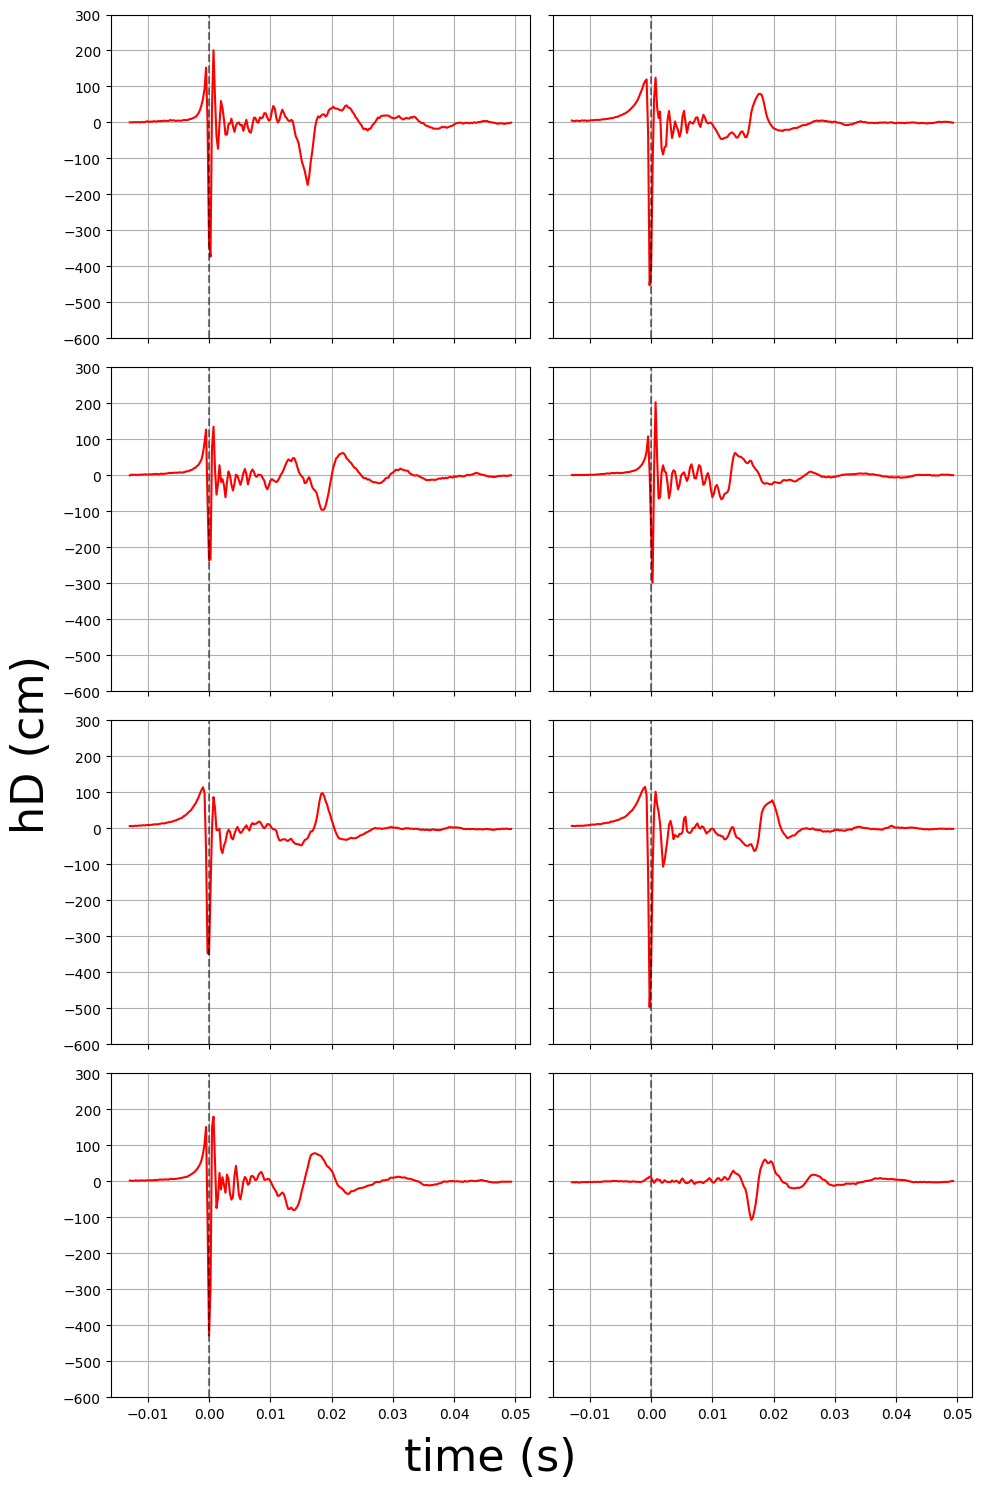

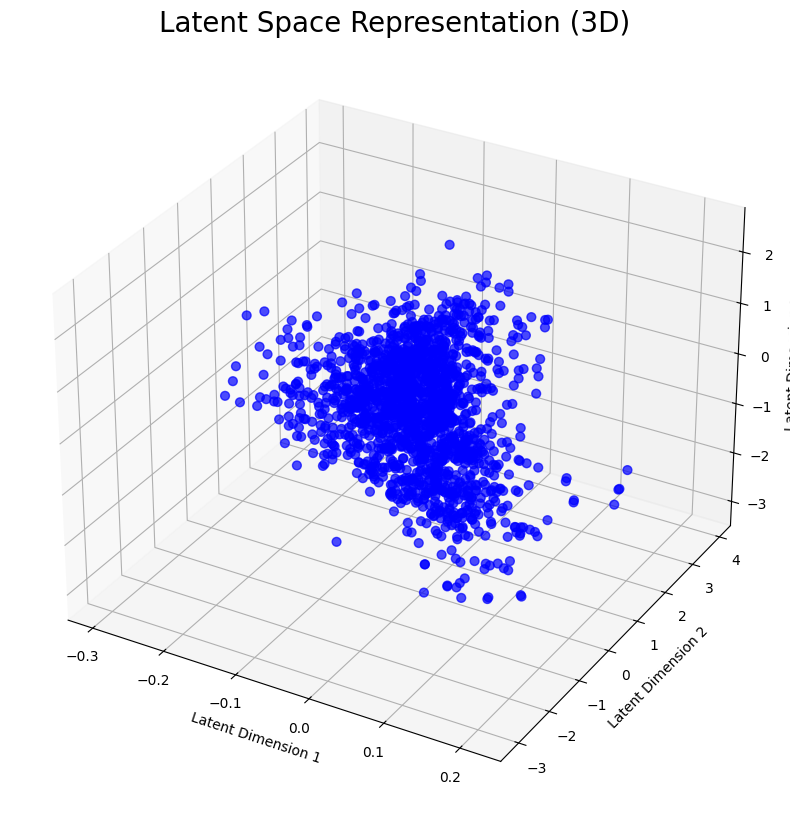

Epochs:  38%|███▊      | 97/256 [02:51<04:55,  1.86s/it]

Epoch 97/256 | Train Loss: 29.8008 | Val Loss: 29.1919


Epochs:  38%|███▊      | 98/256 [02:53<04:51,  1.85s/it]

Epoch 98/256 | Train Loss: 29.0135 | Val Loss: 28.2978


Epochs:  39%|███▊      | 99/256 [02:54<04:48,  1.84s/it]

Epoch 99/256 | Train Loss: 29.3148 | Val Loss: 28.7329


Epochs:  39%|███▉      | 100/256 [02:56<04:47,  1.84s/it]

Epoch 100/256 | Train Loss: 28.9951 | Val Loss: 29.3868


Epochs:  39%|███▉      | 101/256 [02:58<04:38,  1.80s/it]

Epoch 101/256 | Train Loss: 29.0860 | Val Loss: 28.9216


Epochs:  40%|███▉      | 102/256 [03:00<04:32,  1.77s/it]

Epoch 102/256 | Train Loss: 28.8697 | Val Loss: 28.8394


Epochs:  40%|████      | 103/256 [03:02<04:37,  1.82s/it]

Epoch 103/256 | Train Loss: 29.0498 | Val Loss: 28.8426


Epochs:  41%|████      | 104/256 [03:04<04:42,  1.86s/it]

Epoch 104/256 | Train Loss: 28.9038 | Val Loss: 28.7464


Epochs:  41%|████      | 105/256 [03:05<04:32,  1.80s/it]

Epoch 105/256 | Train Loss: 29.1139 | Val Loss: 29.1733


Epochs:  41%|████▏     | 106/256 [03:07<04:23,  1.75s/it]

Epoch 106/256 | Train Loss: 29.2350 | Val Loss: 29.4377


Epochs:  42%|████▏     | 107/256 [03:09<04:13,  1.70s/it]

Epoch 107/256 | Train Loss: 29.2469 | Val Loss: 28.4725


Epochs:  42%|████▏     | 108/256 [03:10<04:18,  1.74s/it]

Epoch 108/256 | Train Loss: 28.9911 | Val Loss: 28.8768


Epochs:  43%|████▎     | 109/256 [03:12<04:32,  1.86s/it]

Epoch 109/256 | Train Loss: 28.8505 | Val Loss: 28.3353


Epochs:  43%|████▎     | 110/256 [03:14<04:21,  1.79s/it]

Epoch 110/256 | Train Loss: 29.0756 | Val Loss: 28.1333


Epochs:  43%|████▎     | 111/256 [03:16<04:18,  1.78s/it]

Epoch 111/256 | Train Loss: 28.6425 | Val Loss: 28.6391
Epoch 112/256 | Train Loss: 28.9532 | Val Loss: 28.8619


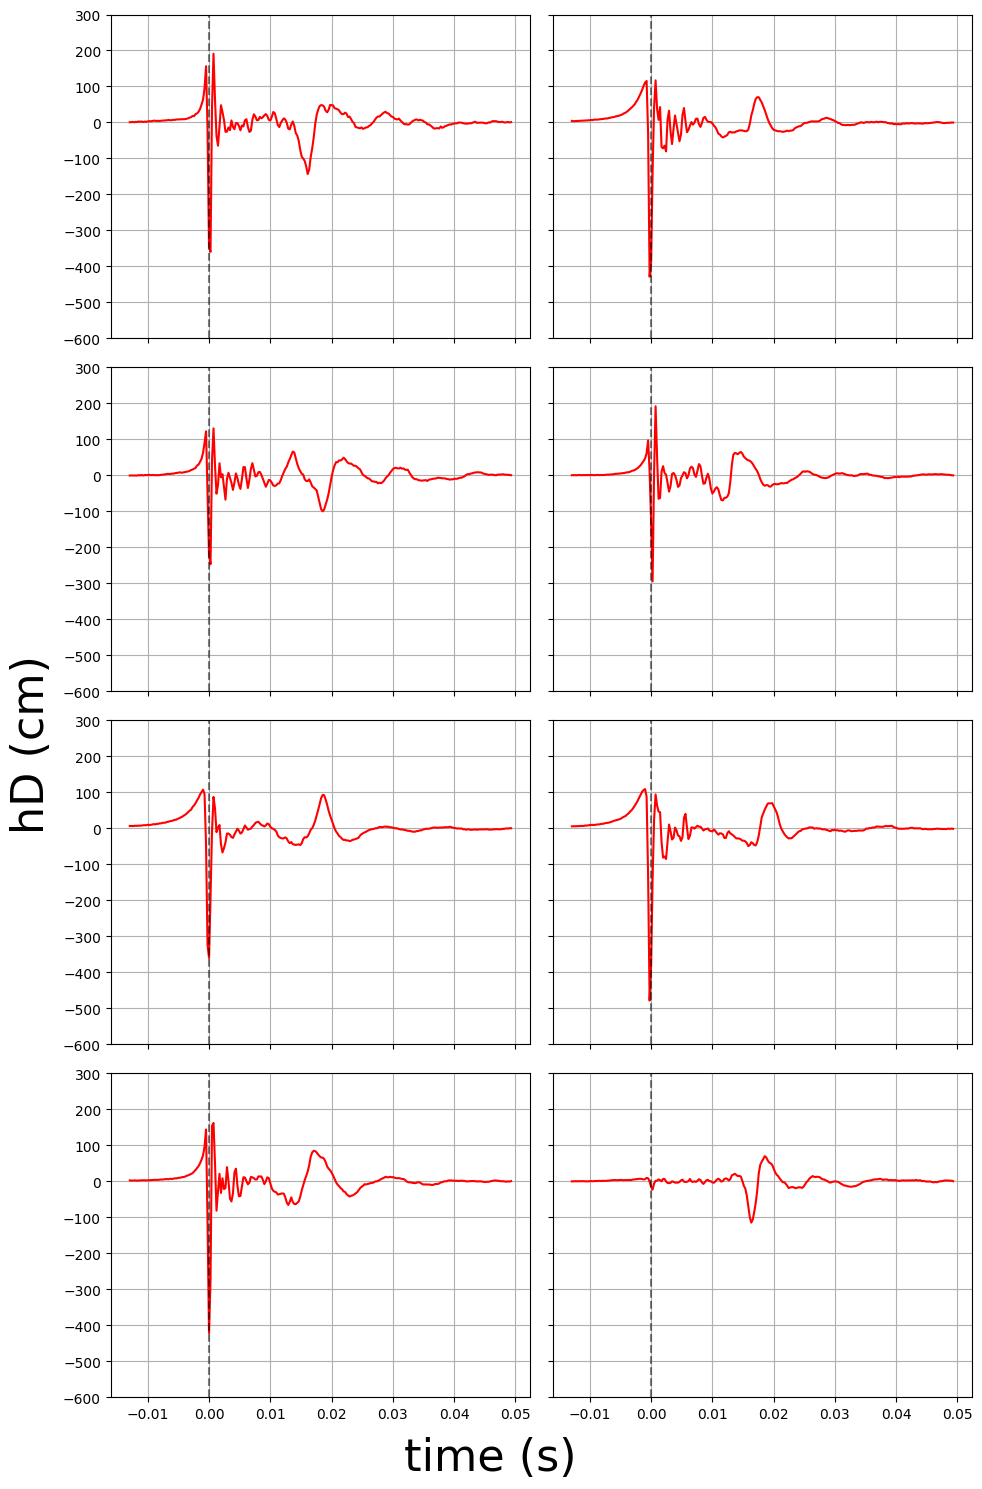

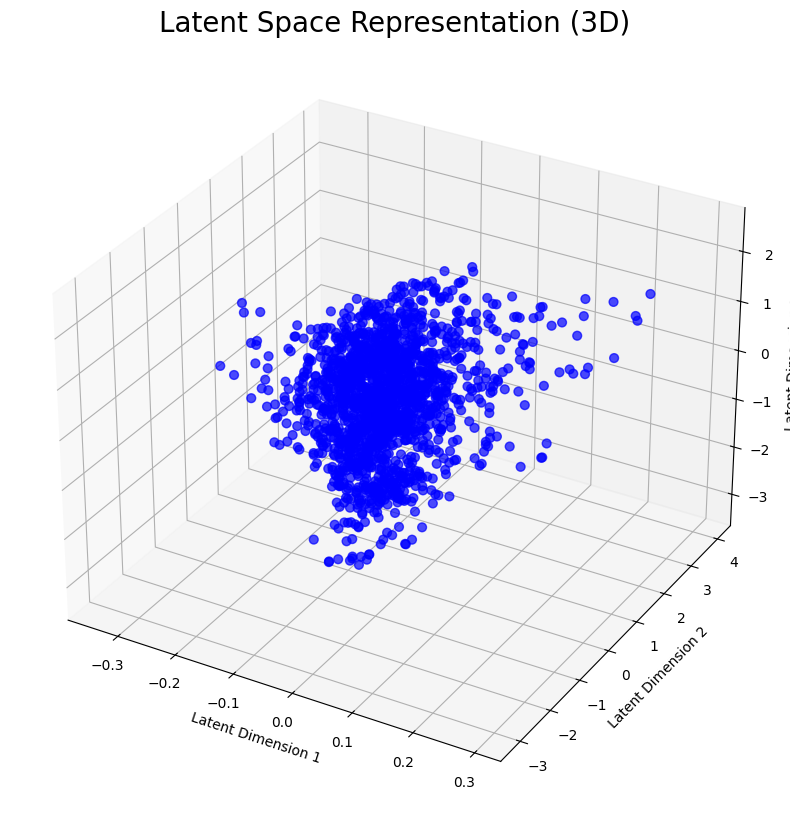

Epochs:  44%|████▍     | 113/256 [03:21<04:48,  2.02s/it]

Epoch 113/256 | Train Loss: 28.6353 | Val Loss: 27.8046


Epochs:  45%|████▍     | 114/256 [03:22<04:37,  1.95s/it]

Epoch 114/256 | Train Loss: 28.6706 | Val Loss: 28.4309


Epochs:  45%|████▍     | 115/256 [03:24<04:19,  1.84s/it]

Epoch 115/256 | Train Loss: 28.6881 | Val Loss: 28.1040


Epochs:  45%|████▌     | 116/256 [03:26<04:07,  1.76s/it]

Epoch 116/256 | Train Loss: 28.2182 | Val Loss: 28.0642


Epochs:  46%|████▌     | 117/256 [03:27<04:01,  1.74s/it]

Epoch 117/256 | Train Loss: 28.3474 | Val Loss: 28.0541


Epochs:  46%|████▌     | 118/256 [03:29<03:53,  1.70s/it]

Epoch 118/256 | Train Loss: 28.2556 | Val Loss: 28.5003


Epochs:  46%|████▋     | 119/256 [03:30<03:46,  1.65s/it]

Epoch 119/256 | Train Loss: 28.3893 | Val Loss: 27.6808


Epochs:  47%|████▋     | 120/256 [03:32<03:40,  1.62s/it]

Epoch 120/256 | Train Loss: 28.2288 | Val Loss: 27.4525


Epochs:  47%|████▋     | 121/256 [03:34<03:36,  1.61s/it]

Epoch 121/256 | Train Loss: 28.2259 | Val Loss: 27.7449


Epochs:  48%|████▊     | 122/256 [03:35<03:39,  1.64s/it]

Epoch 122/256 | Train Loss: 28.2365 | Val Loss: 28.1809


Epochs:  48%|████▊     | 123/256 [03:37<03:38,  1.64s/it]

Epoch 123/256 | Train Loss: 28.0358 | Val Loss: 27.9216


Epochs:  48%|████▊     | 124/256 [03:39<03:37,  1.65s/it]

Epoch 124/256 | Train Loss: 27.8933 | Val Loss: 27.9136


Epochs:  49%|████▉     | 125/256 [03:41<03:52,  1.77s/it]

Epoch 125/256 | Train Loss: 27.6385 | Val Loss: 27.1208


Epochs:  49%|████▉     | 126/256 [03:42<03:46,  1.74s/it]

Epoch 126/256 | Train Loss: 27.9747 | Val Loss: 27.7091


Epochs:  50%|████▉     | 127/256 [03:44<03:38,  1.69s/it]

Epoch 127/256 | Train Loss: 28.0388 | Val Loss: 27.8057
Epoch 128/256 | Train Loss: 27.9232 | Val Loss: 27.9099


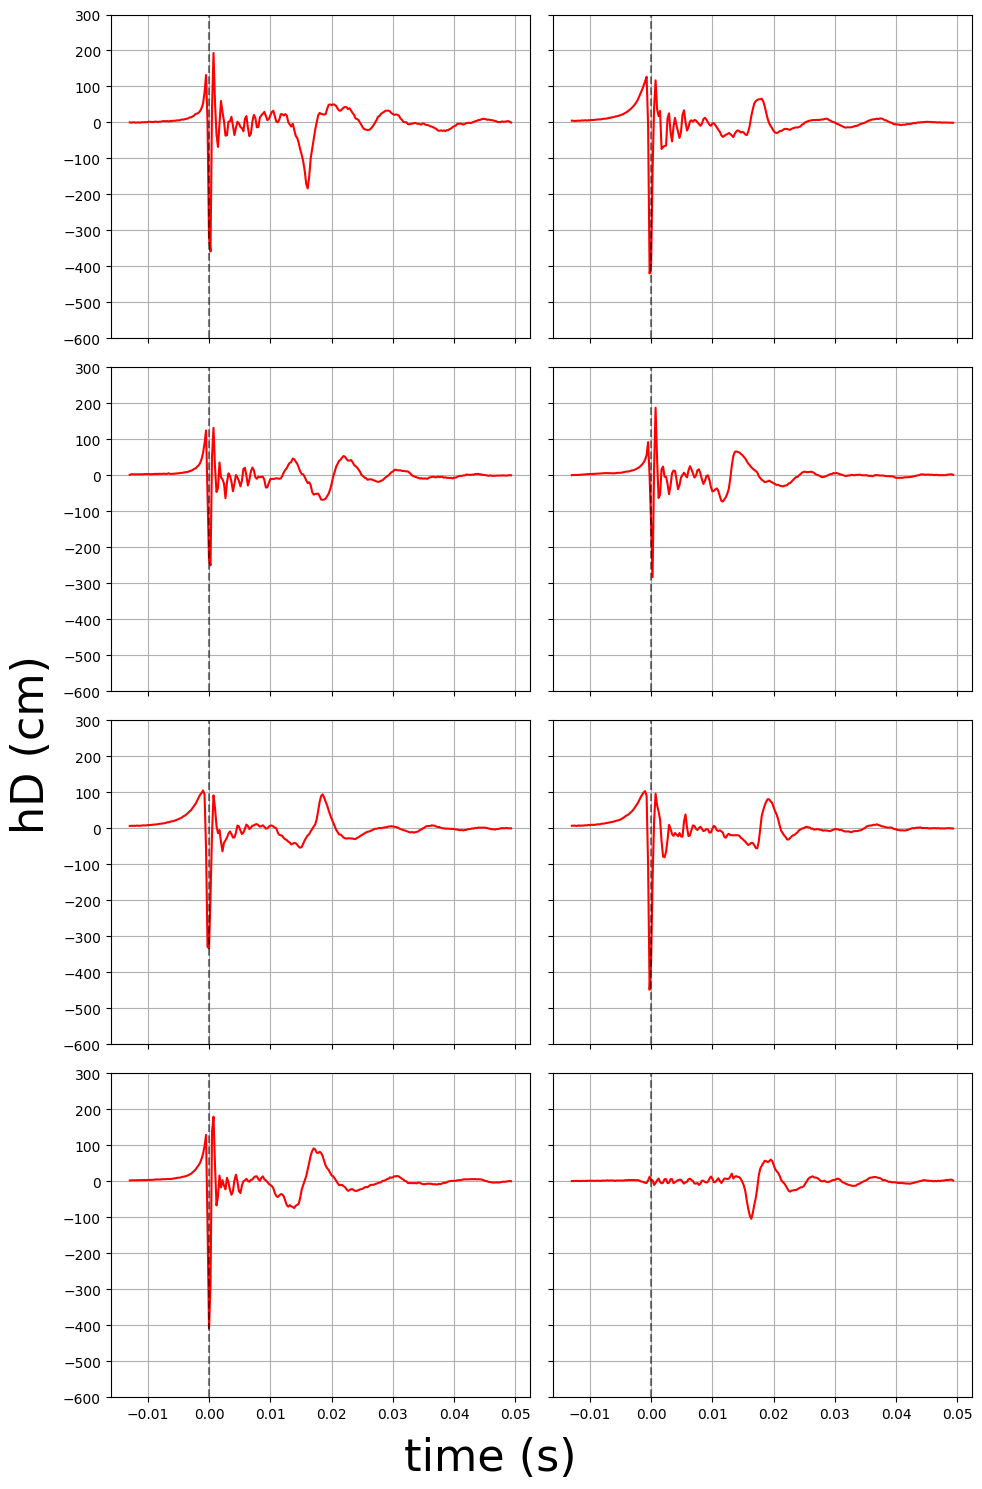

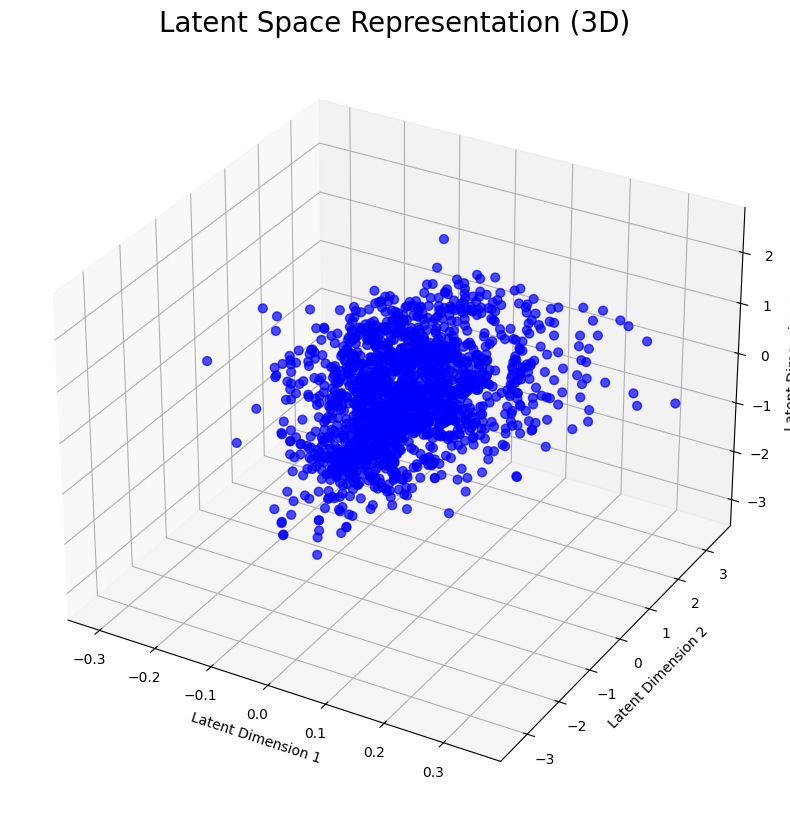

Epochs:  50%|█████     | 129/256 [03:49<04:12,  1.99s/it]

Epoch 129/256 | Train Loss: 28.2055 | Val Loss: 27.9963


Epochs:  51%|█████     | 130/256 [03:50<04:05,  1.95s/it]

Epoch 130/256 | Train Loss: 27.9749 | Val Loss: 27.8320


Epochs:  51%|█████     | 131/256 [03:52<03:55,  1.89s/it]

Epoch 131/256 | Train Loss: 27.7208 | Val Loss: 27.2628


Epochs:  52%|█████▏    | 132/256 [03:54<03:47,  1.83s/it]

Epoch 132/256 | Train Loss: 27.7624 | Val Loss: 28.0730


Epochs:  52%|█████▏    | 133/256 [03:55<03:37,  1.76s/it]

Epoch 133/256 | Train Loss: 28.0676 | Val Loss: 27.6690


Epochs:  52%|█████▏    | 134/256 [03:57<03:39,  1.80s/it]

Epoch 134/256 | Train Loss: 27.7027 | Val Loss: 27.5903


Epochs:  53%|█████▎    | 135/256 [03:59<03:38,  1.81s/it]

Epoch 135/256 | Train Loss: 27.8334 | Val Loss: 27.8648


Epochs:  53%|█████▎    | 136/256 [04:01<03:30,  1.75s/it]

Epoch 136/256 | Train Loss: 27.5500 | Val Loss: 27.0706


Epochs:  54%|█████▎    | 137/256 [04:02<03:27,  1.75s/it]

Epoch 137/256 | Train Loss: 27.4985 | Val Loss: 27.1702


Epochs:  54%|█████▍    | 138/256 [04:04<03:24,  1.74s/it]

Epoch 138/256 | Train Loss: 27.5321 | Val Loss: 26.9753


Epochs:  54%|█████▍    | 139/256 [04:06<03:30,  1.80s/it]

Epoch 139/256 | Train Loss: 27.0628 | Val Loss: 26.6267


Epochs:  55%|█████▍    | 140/256 [04:08<03:24,  1.76s/it]

Epoch 140/256 | Train Loss: 27.4367 | Val Loss: 27.1857


Epochs:  55%|█████▌    | 141/256 [04:09<03:17,  1.72s/it]

Epoch 141/256 | Train Loss: 27.3584 | Val Loss: 28.0173


Epochs:  55%|█████▌    | 142/256 [04:11<03:18,  1.74s/it]

Epoch 142/256 | Train Loss: 27.7750 | Val Loss: 27.0938


Epochs:  56%|█████▌    | 143/256 [04:13<03:21,  1.78s/it]

Epoch 143/256 | Train Loss: 27.6066 | Val Loss: 27.5881
Epoch 144/256 | Train Loss: 27.1664 | Val Loss: 27.2092


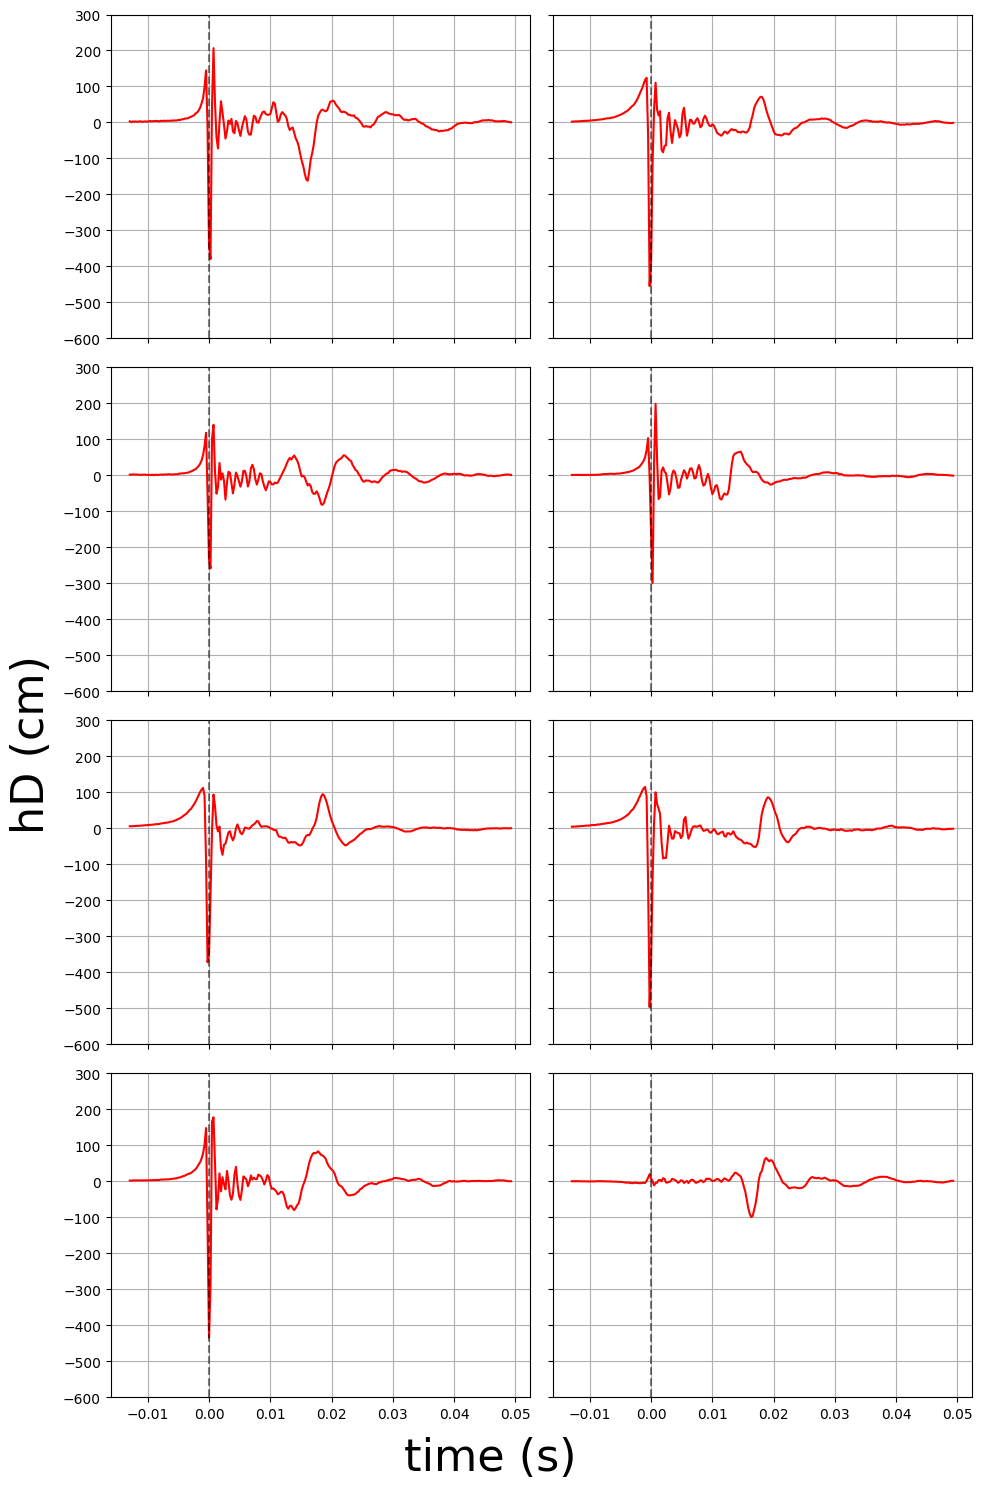

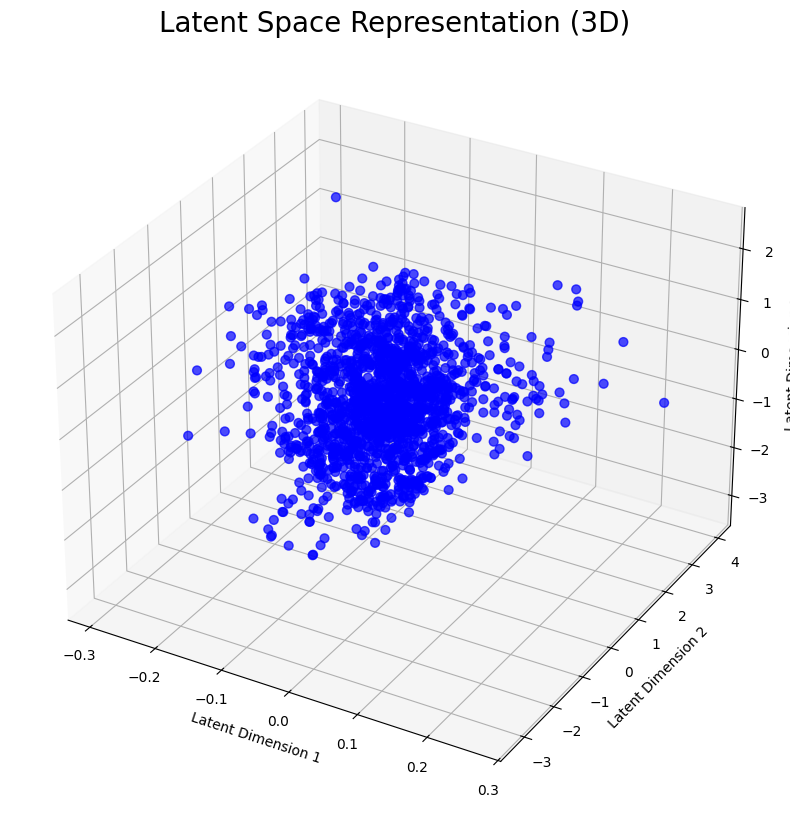

Epochs:  57%|█████▋    | 145/256 [04:17<03:32,  1.92s/it]

Epoch 145/256 | Train Loss: 27.2314 | Val Loss: 26.7163


Epochs:  57%|█████▋    | 146/256 [04:19<03:22,  1.84s/it]

Epoch 146/256 | Train Loss: 27.0619 | Val Loss: 26.9424


Epochs:  57%|█████▋    | 147/256 [04:21<03:14,  1.78s/it]

Epoch 147/256 | Train Loss: 26.9754 | Val Loss: 26.5001


Epochs:  58%|█████▊    | 148/256 [04:22<03:11,  1.77s/it]

Epoch 148/256 | Train Loss: 27.1802 | Val Loss: 26.8170


Epochs:  58%|█████▊    | 149/256 [04:24<03:17,  1.85s/it]

Epoch 149/256 | Train Loss: 26.8346 | Val Loss: 26.3306


Epochs:  59%|█████▊    | 150/256 [04:26<03:15,  1.84s/it]

Epoch 150/256 | Train Loss: 26.6026 | Val Loss: 27.0567


Epochs:  59%|█████▉    | 151/256 [04:28<03:10,  1.81s/it]

Epoch 151/256 | Train Loss: 26.9477 | Val Loss: 27.1748


Epochs:  59%|█████▉    | 152/256 [04:30<03:05,  1.78s/it]

Epoch 152/256 | Train Loss: 27.3158 | Val Loss: 27.2282


Epochs:  60%|█████▉    | 153/256 [04:32<03:03,  1.78s/it]

Epoch 153/256 | Train Loss: 27.1893 | Val Loss: 26.9589


Epochs:  60%|██████    | 154/256 [04:33<03:06,  1.83s/it]

Epoch 154/256 | Train Loss: 27.0512 | Val Loss: 27.0133


Epochs:  61%|██████    | 155/256 [04:36<03:12,  1.91s/it]

Epoch 155/256 | Train Loss: 26.7971 | Val Loss: 26.8216


Epochs:  61%|██████    | 156/256 [04:37<03:09,  1.89s/it]

Epoch 156/256 | Train Loss: 26.8671 | Val Loss: 26.4496


Epochs:  61%|██████▏   | 157/256 [04:39<03:08,  1.91s/it]

Epoch 157/256 | Train Loss: 26.9921 | Val Loss: 26.7281


Epochs:  62%|██████▏   | 158/256 [04:41<03:02,  1.87s/it]

Epoch 158/256 | Train Loss: 26.7832 | Val Loss: 26.4238


Epochs:  62%|██████▏   | 159/256 [04:43<02:52,  1.78s/it]

Epoch 159/256 | Train Loss: 26.8340 | Val Loss: 26.3353
Epoch 160/256 | Train Loss: 26.6623 | Val Loss: 26.1849


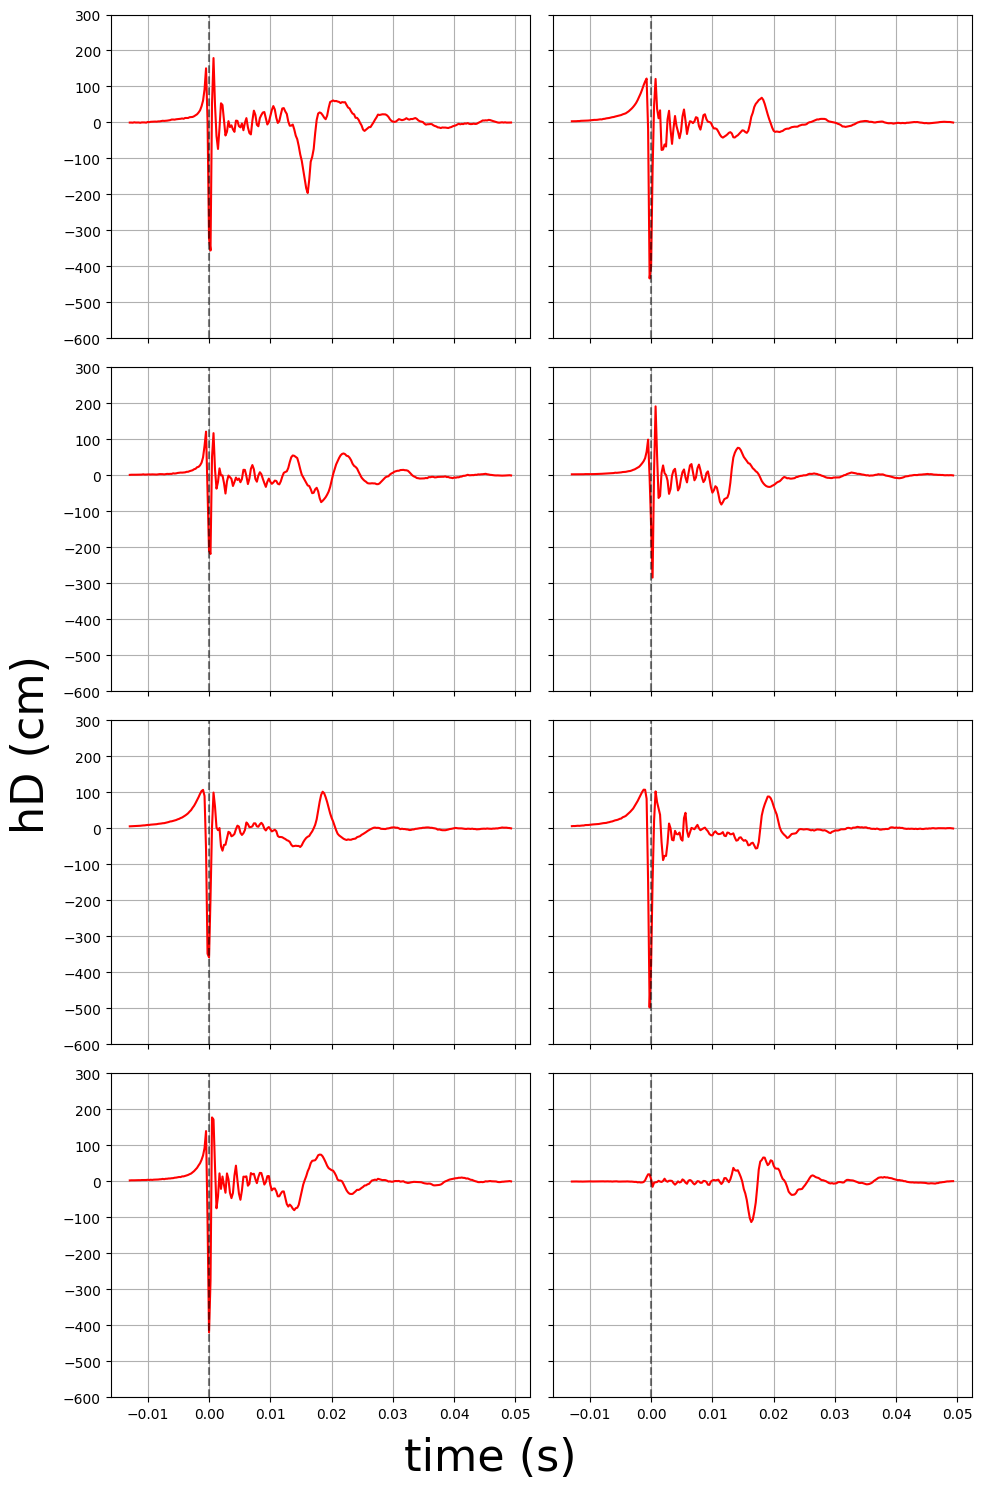

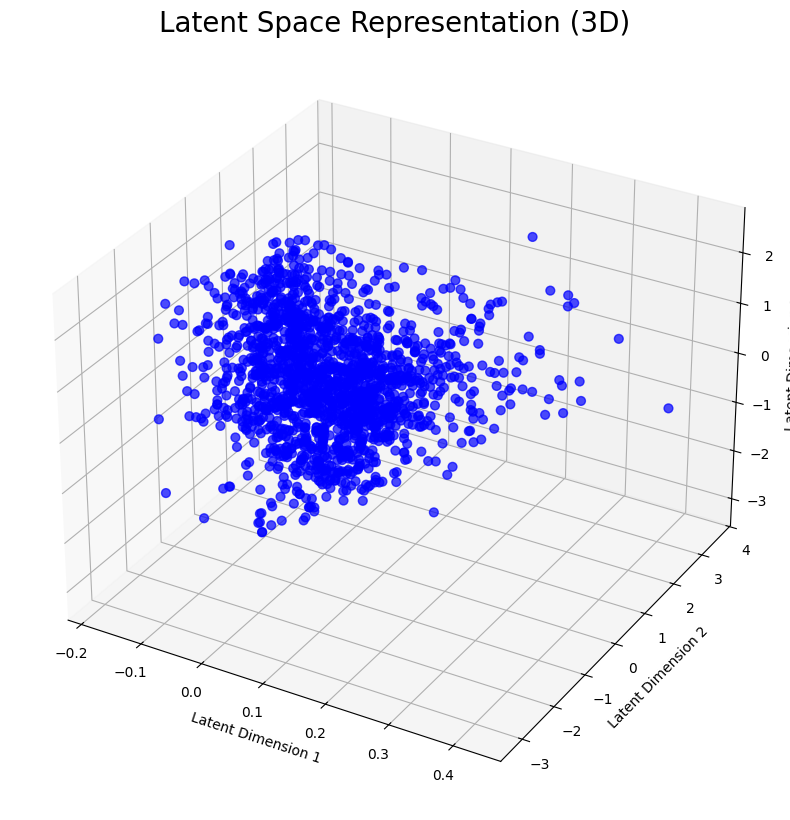

Epochs:  63%|██████▎   | 161/256 [04:47<02:58,  1.88s/it]

Epoch 161/256 | Train Loss: 26.7963 | Val Loss: 26.4659


Epochs:  63%|██████▎   | 162/256 [04:48<02:48,  1.79s/it]

Epoch 162/256 | Train Loss: 26.4713 | Val Loss: 25.9283


Epochs:  64%|██████▎   | 163/256 [04:50<02:42,  1.75s/it]

Epoch 163/256 | Train Loss: 26.5226 | Val Loss: 26.3606


Epochs:  64%|██████▍   | 164/256 [04:52<02:36,  1.70s/it]

Epoch 164/256 | Train Loss: 26.6030 | Val Loss: 26.3306


Epochs:  64%|██████▍   | 165/256 [04:53<02:34,  1.70s/it]

Epoch 165/256 | Train Loss: 26.5589 | Val Loss: 26.4994


Epochs:  65%|██████▍   | 166/256 [04:55<02:32,  1.69s/it]

Epoch 166/256 | Train Loss: 26.4836 | Val Loss: 26.6240


Epochs:  65%|██████▌   | 167/256 [04:57<02:26,  1.65s/it]

Epoch 167/256 | Train Loss: 26.7680 | Val Loss: 26.0262


Epochs:  66%|██████▌   | 168/256 [04:58<02:25,  1.65s/it]

Epoch 168/256 | Train Loss: 26.3877 | Val Loss: 26.0482


Epochs:  66%|██████▌   | 169/256 [05:00<02:22,  1.63s/it]

Epoch 169/256 | Train Loss: 26.1442 | Val Loss: 26.3208


Epochs:  66%|██████▋   | 170/256 [05:01<02:19,  1.62s/it]

Epoch 170/256 | Train Loss: 26.4402 | Val Loss: 26.0807


Epochs:  67%|██████▋   | 171/256 [05:03<02:29,  1.75s/it]

Epoch 171/256 | Train Loss: 26.0806 | Val Loss: 25.9064


Epochs:  67%|██████▋   | 172/256 [05:05<02:33,  1.82s/it]

Epoch 172/256 | Train Loss: 26.1369 | Val Loss: 25.6686


Epochs:  68%|██████▊   | 173/256 [05:07<02:34,  1.87s/it]

Epoch 173/256 | Train Loss: 26.2379 | Val Loss: 26.2817


Epochs:  68%|██████▊   | 174/256 [05:09<02:31,  1.85s/it]

Epoch 174/256 | Train Loss: 26.5172 | Val Loss: 26.5061


Epochs:  68%|██████▊   | 175/256 [05:11<02:31,  1.87s/it]

Epoch 175/256 | Train Loss: 26.5014 | Val Loss: 25.5854
Epoch 176/256 | Train Loss: 26.3684 | Val Loss: 26.0815


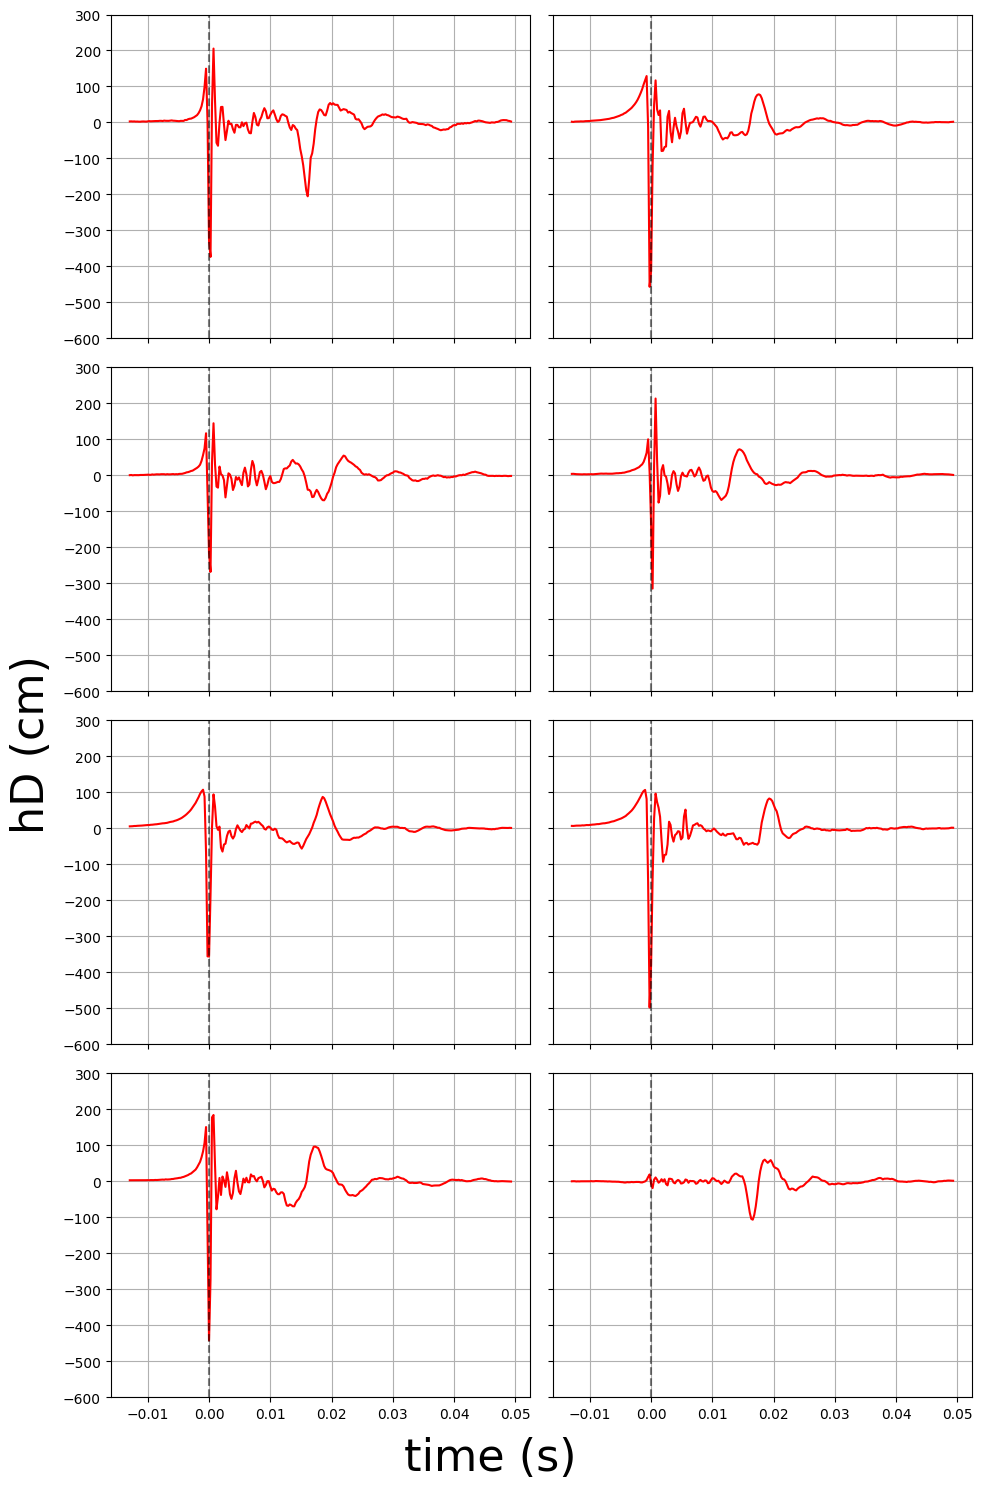

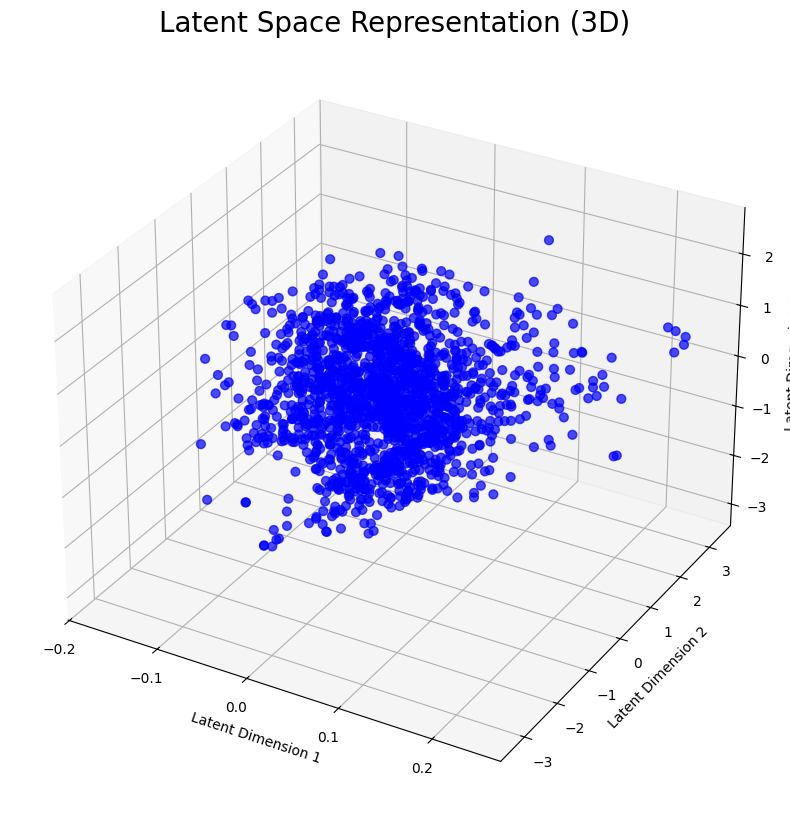

Epochs:  69%|██████▉   | 177/256 [05:15<02:35,  1.97s/it]

Epoch 177/256 | Train Loss: 26.3083 | Val Loss: 25.8139


Epochs:  70%|██████▉   | 178/256 [05:17<02:25,  1.86s/it]

Epoch 178/256 | Train Loss: 26.5900 | Val Loss: 26.1519


Epochs:  70%|██████▉   | 179/256 [05:19<02:17,  1.79s/it]

Epoch 179/256 | Train Loss: 26.6863 | Val Loss: 26.4218


Epochs:  70%|███████   | 180/256 [05:20<02:10,  1.72s/it]

Epoch 180/256 | Train Loss: 26.4381 | Val Loss: 25.7914


Epochs:  71%|███████   | 181/256 [05:22<02:06,  1.68s/it]

Epoch 181/256 | Train Loss: 25.9768 | Val Loss: 25.9544


Epochs:  71%|███████   | 182/256 [05:24<02:05,  1.70s/it]

Epoch 182/256 | Train Loss: 26.0090 | Val Loss: 25.9780


Epochs:  71%|███████▏  | 183/256 [05:25<02:07,  1.75s/it]

Epoch 183/256 | Train Loss: 26.3040 | Val Loss: 25.8812


Epochs:  72%|███████▏  | 184/256 [05:27<02:08,  1.79s/it]

Epoch 184/256 | Train Loss: 25.9696 | Val Loss: 25.3501


Epochs:  72%|███████▏  | 185/256 [05:29<02:03,  1.74s/it]

Epoch 185/256 | Train Loss: 25.6715 | Val Loss: 25.6658


Epochs:  73%|███████▎  | 186/256 [05:31<01:59,  1.71s/it]

Epoch 186/256 | Train Loss: 26.1867 | Val Loss: 25.6384


Epochs:  73%|███████▎  | 187/256 [05:32<01:55,  1.67s/it]

Epoch 187/256 | Train Loss: 26.0451 | Val Loss: 25.1841


Epochs:  73%|███████▎  | 188/256 [05:34<01:53,  1.66s/it]

Epoch 188/256 | Train Loss: 25.9554 | Val Loss: 25.8870


Epochs:  74%|███████▍  | 189/256 [05:36<01:54,  1.70s/it]

Epoch 189/256 | Train Loss: 26.2601 | Val Loss: 26.0252


Epochs:  74%|███████▍  | 190/256 [05:37<01:51,  1.69s/it]

Epoch 190/256 | Train Loss: 26.1204 | Val Loss: 25.3971


Epochs:  75%|███████▍  | 191/256 [05:39<01:55,  1.77s/it]

Epoch 191/256 | Train Loss: 25.6713 | Val Loss: 25.2154
Epoch 192/256 | Train Loss: 25.6970 | Val Loss: 25.7924


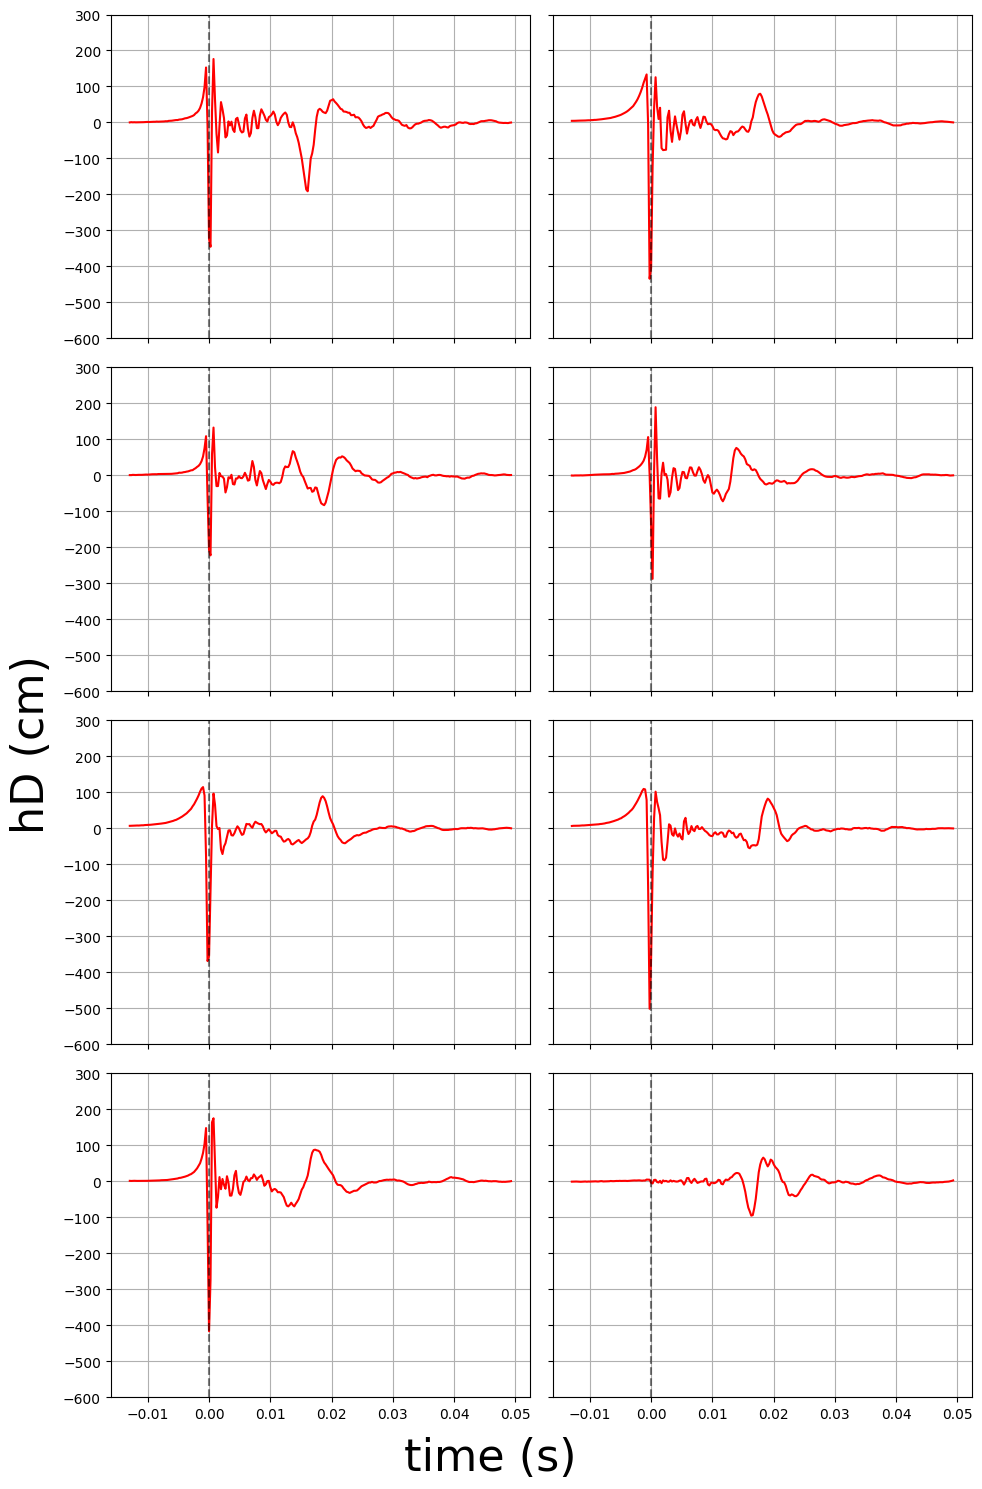

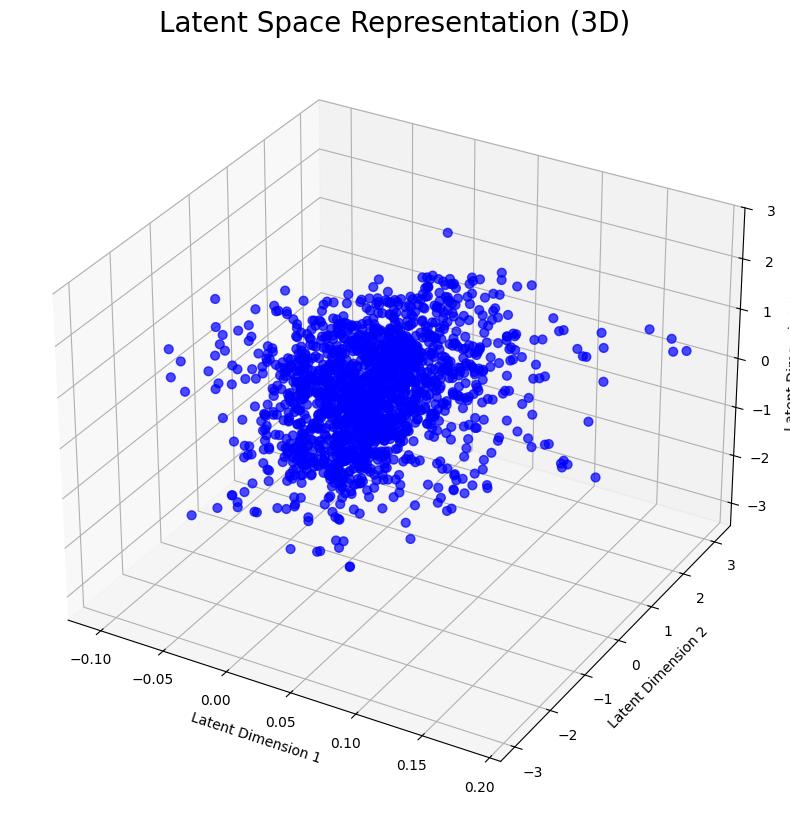

Epochs:  75%|███████▌  | 193/256 [05:44<02:05,  1.99s/it]

Epoch 193/256 | Train Loss: 26.0407 | Val Loss: 25.3466


Epochs:  76%|███████▌  | 194/256 [05:46<01:59,  1.92s/it]

Epoch 194/256 | Train Loss: 25.7640 | Val Loss: 25.4157


Epochs:  76%|███████▌  | 195/256 [05:47<01:55,  1.90s/it]

Epoch 195/256 | Train Loss: 25.9012 | Val Loss: 25.8688


Epochs:  77%|███████▋  | 196/256 [05:49<01:50,  1.85s/it]

Epoch 196/256 | Train Loss: 25.6371 | Val Loss: 25.3074


Epochs:  77%|███████▋  | 197/256 [05:51<01:45,  1.79s/it]

Epoch 197/256 | Train Loss: 25.8202 | Val Loss: 25.3987


Epochs:  77%|███████▋  | 198/256 [05:52<01:41,  1.75s/it]

Epoch 198/256 | Train Loss: 25.8295 | Val Loss: 25.3137


Epochs:  78%|███████▊  | 199/256 [05:54<01:39,  1.75s/it]

Epoch 199/256 | Train Loss: 25.9639 | Val Loss: 26.1781


Epochs:  78%|███████▊  | 200/256 [05:56<01:35,  1.71s/it]

Epoch 200/256 | Train Loss: 26.0247 | Val Loss: 25.8930


Epochs:  79%|███████▊  | 201/256 [05:58<01:34,  1.72s/it]

Epoch 201/256 | Train Loss: 25.9852 | Val Loss: 26.0952


Epochs:  79%|███████▉  | 202/256 [06:00<01:37,  1.80s/it]

Epoch 202/256 | Train Loss: 25.8319 | Val Loss: 25.1763


Epochs:  79%|███████▉  | 203/256 [06:01<01:35,  1.81s/it]

Epoch 203/256 | Train Loss: 25.6641 | Val Loss: 25.4840


Epochs:  80%|███████▉  | 204/256 [06:04<01:39,  1.92s/it]

Epoch 204/256 | Train Loss: 25.4686 | Val Loss: 25.1019


Epochs:  80%|████████  | 205/256 [06:05<01:35,  1.87s/it]

Epoch 205/256 | Train Loss: 25.4734 | Val Loss: 25.1682


Epochs:  80%|████████  | 206/256 [06:07<01:30,  1.80s/it]

Epoch 206/256 | Train Loss: 25.9467 | Val Loss: 25.1673


Epochs:  81%|████████  | 207/256 [06:09<01:25,  1.75s/it]

Epoch 207/256 | Train Loss: 25.6228 | Val Loss: 25.3901
Epoch 208/256 | Train Loss: 25.7676 | Val Loss: 25.1735


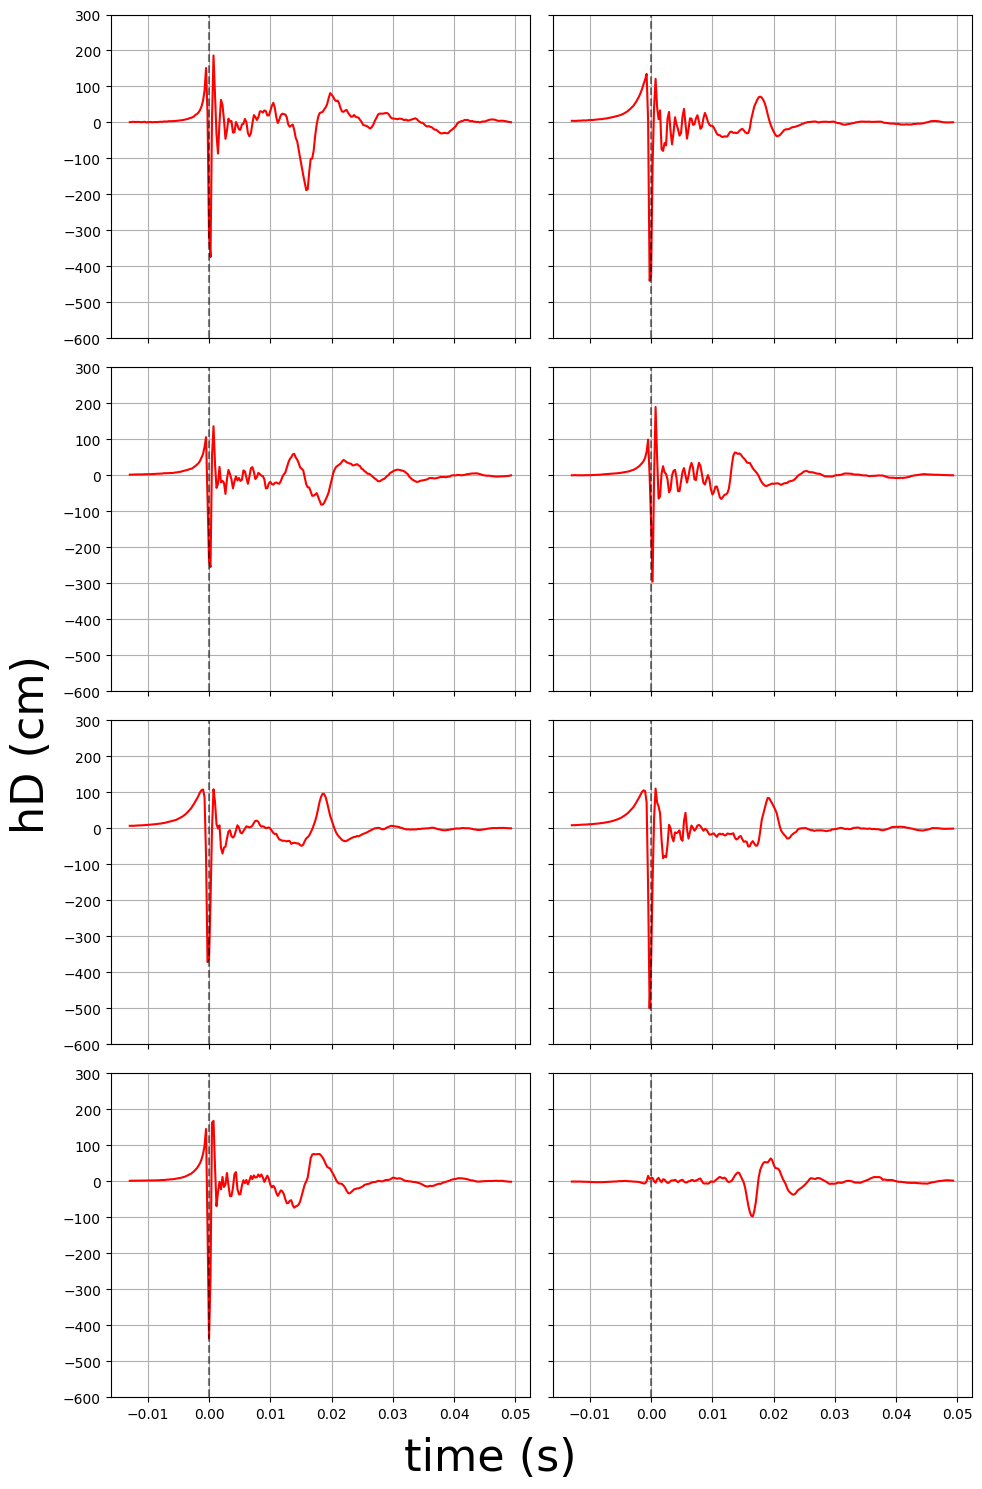

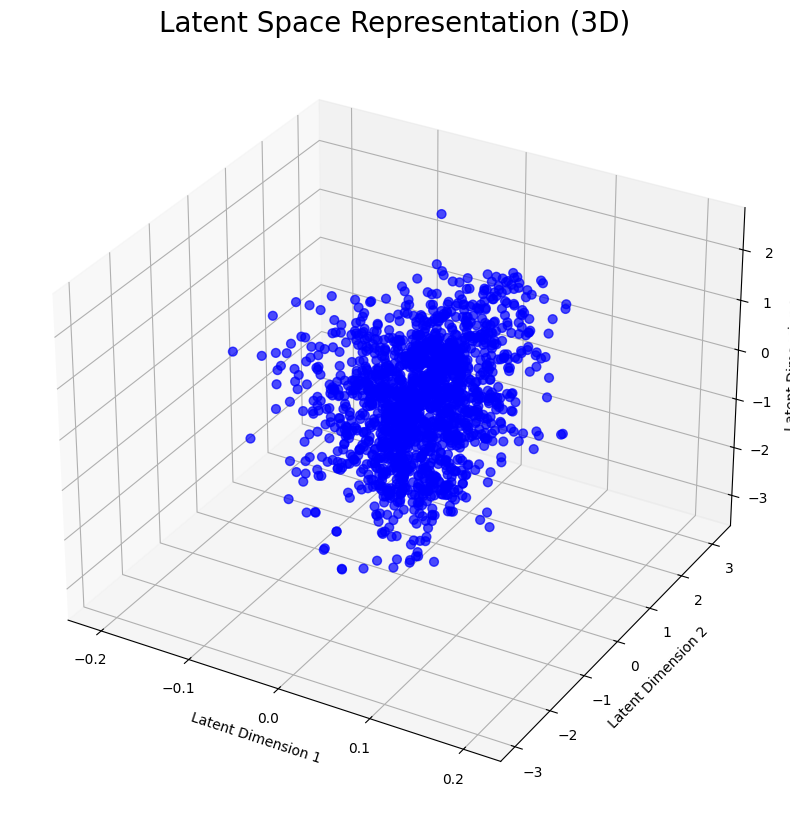

Epochs:  82%|████████▏ | 209/256 [06:14<01:39,  2.13s/it]

Epoch 209/256 | Train Loss: 25.6354 | Val Loss: 25.2590


Epochs:  82%|████████▏ | 210/256 [06:16<01:34,  2.06s/it]

Epoch 210/256 | Train Loss: 25.6158 | Val Loss: 25.2020


Epochs:  82%|████████▏ | 211/256 [06:18<01:32,  2.05s/it]

Epoch 211/256 | Train Loss: 25.3813 | Val Loss: 25.2707


Epochs:  83%|████████▎ | 212/256 [06:19<01:25,  1.95s/it]

Epoch 212/256 | Train Loss: 25.7474 | Val Loss: 25.3036


Epochs:  83%|████████▎ | 213/256 [06:21<01:20,  1.88s/it]

Epoch 213/256 | Train Loss: 25.1233 | Val Loss: 24.7158


Epochs:  84%|████████▎ | 214/256 [06:23<01:15,  1.80s/it]

Epoch 214/256 | Train Loss: 25.3734 | Val Loss: 25.2538


Epochs:  84%|████████▍ | 215/256 [06:24<01:11,  1.74s/it]

Epoch 215/256 | Train Loss: 25.2217 | Val Loss: 24.9500


Epochs:  84%|████████▍ | 216/256 [06:26<01:07,  1.70s/it]

Epoch 216/256 | Train Loss: 25.6233 | Val Loss: 24.7906


Epochs:  85%|████████▍ | 217/256 [06:28<01:07,  1.72s/it]

Epoch 217/256 | Train Loss: 25.5361 | Val Loss: 25.1658


Epochs:  85%|████████▌ | 218/256 [06:29<01:03,  1.68s/it]

Epoch 218/256 | Train Loss: 25.1647 | Val Loss: 25.7705


Epochs:  86%|████████▌ | 219/256 [06:31<01:01,  1.65s/it]

Epoch 219/256 | Train Loss: 25.2800 | Val Loss: 25.5378


Epochs:  86%|████████▌ | 220/256 [06:32<00:59,  1.64s/it]

Epoch 220/256 | Train Loss: 25.0930 | Val Loss: 25.0851


Epochs:  86%|████████▋ | 221/256 [06:34<00:58,  1.67s/it]

Epoch 221/256 | Train Loss: 25.1441 | Val Loss: 24.7006


Epochs:  87%|████████▋ | 222/256 [06:36<00:56,  1.65s/it]

Epoch 222/256 | Train Loss: 25.1359 | Val Loss: 24.8997


Epochs:  87%|████████▋ | 223/256 [06:37<00:54,  1.65s/it]

Epoch 223/256 | Train Loss: 25.3079 | Val Loss: 25.1442
Epoch 224/256 | Train Loss: 25.5048 | Val Loss: 24.9993


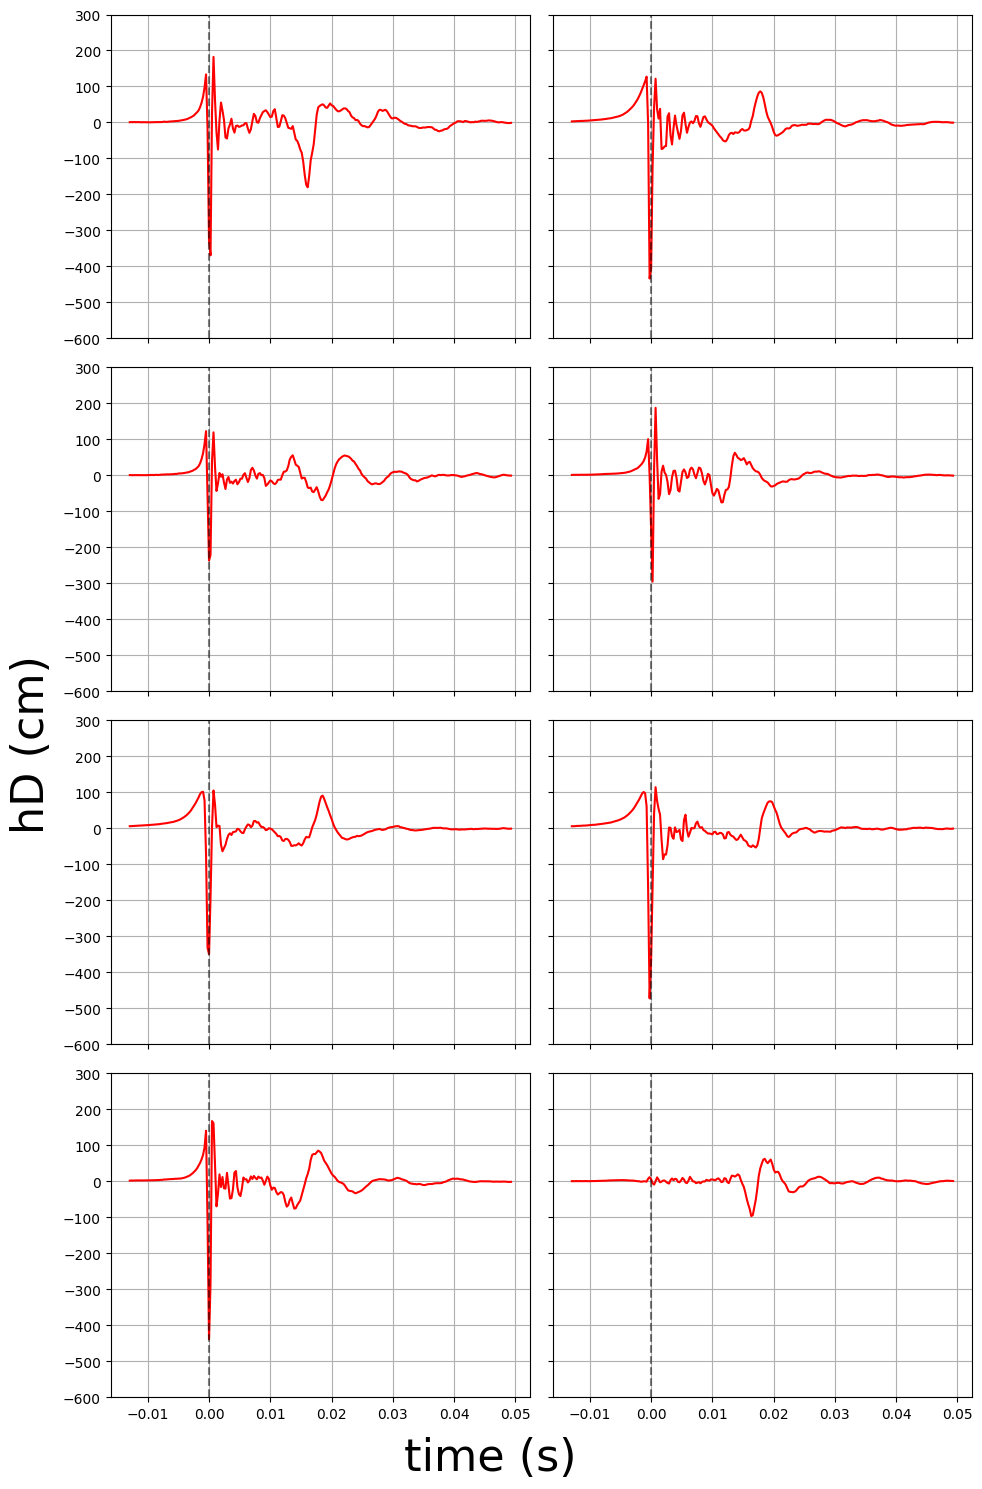

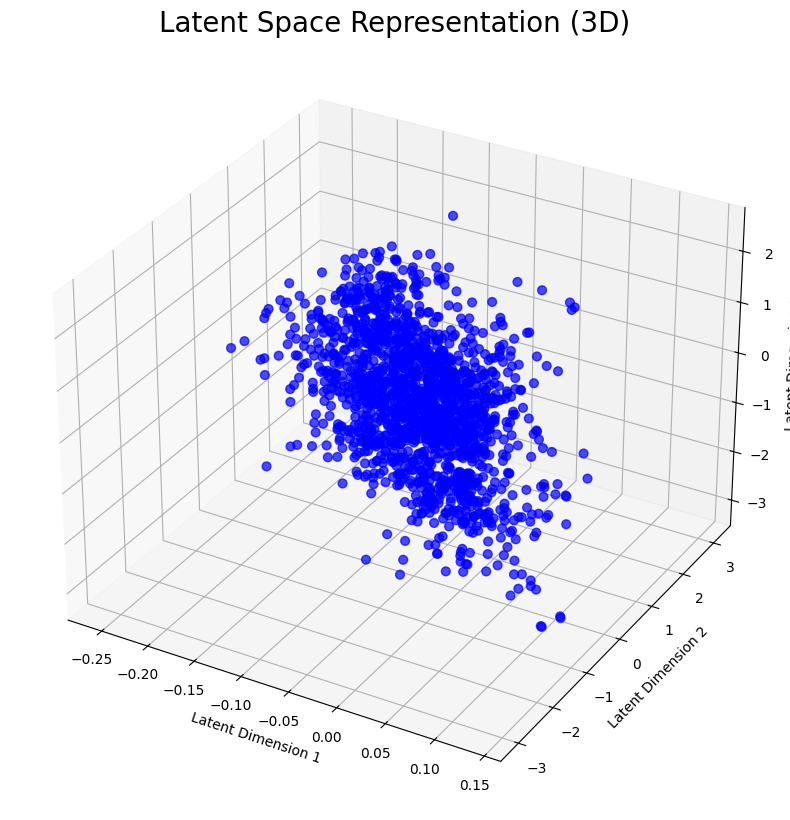

Epochs:  88%|████████▊ | 225/256 [06:42<00:57,  1.86s/it]

Epoch 225/256 | Train Loss: 25.4291 | Val Loss: 24.8730


Epochs:  88%|████████▊ | 226/256 [06:43<00:53,  1.78s/it]

Epoch 226/256 | Train Loss: 25.0416 | Val Loss: 25.0551


Epochs:  89%|████████▊ | 227/256 [06:45<00:50,  1.74s/it]

Epoch 227/256 | Train Loss: 25.2225 | Val Loss: 24.6737


Epochs:  89%|████████▉ | 228/256 [06:47<00:48,  1.72s/it]

Epoch 228/256 | Train Loss: 25.3770 | Val Loss: 24.6835


Epochs:  89%|████████▉ | 229/256 [06:48<00:45,  1.67s/it]

Epoch 229/256 | Train Loss: 25.1410 | Val Loss: 24.7195


Epochs:  90%|████████▉ | 230/256 [06:50<00:42,  1.64s/it]

Epoch 230/256 | Train Loss: 25.0537 | Val Loss: 24.8545


Epochs:  90%|█████████ | 231/256 [06:51<00:40,  1.62s/it]

Epoch 231/256 | Train Loss: 25.0599 | Val Loss: 25.0200


Epochs:  91%|█████████ | 232/256 [06:53<00:39,  1.66s/it]

Epoch 232/256 | Train Loss: 24.9150 | Val Loss: 24.0332


Epochs:  91%|█████████ | 233/256 [06:55<00:37,  1.62s/it]

Epoch 233/256 | Train Loss: 24.6286 | Val Loss: 24.8836


Epochs:  91%|█████████▏| 234/256 [06:56<00:35,  1.60s/it]

Epoch 234/256 | Train Loss: 24.7982 | Val Loss: 24.6120


Epochs:  92%|█████████▏| 235/256 [06:58<00:33,  1.59s/it]

Epoch 235/256 | Train Loss: 24.8931 | Val Loss: 25.1972


Epochs:  92%|█████████▏| 236/256 [06:59<00:32,  1.62s/it]

Epoch 236/256 | Train Loss: 24.9800 | Val Loss: 24.6592


Epochs:  93%|█████████▎| 237/256 [07:01<00:31,  1.64s/it]

Epoch 237/256 | Train Loss: 25.0607 | Val Loss: 24.6574


Epochs:  93%|█████████▎| 238/256 [07:03<00:29,  1.62s/it]

Epoch 238/256 | Train Loss: 24.6415 | Val Loss: 25.0187


Epochs:  93%|█████████▎| 239/256 [07:04<00:27,  1.61s/it]

Epoch 239/256 | Train Loss: 25.1738 | Val Loss: 24.3608
Epoch 240/256 | Train Loss: 24.9238 | Val Loss: 25.4436


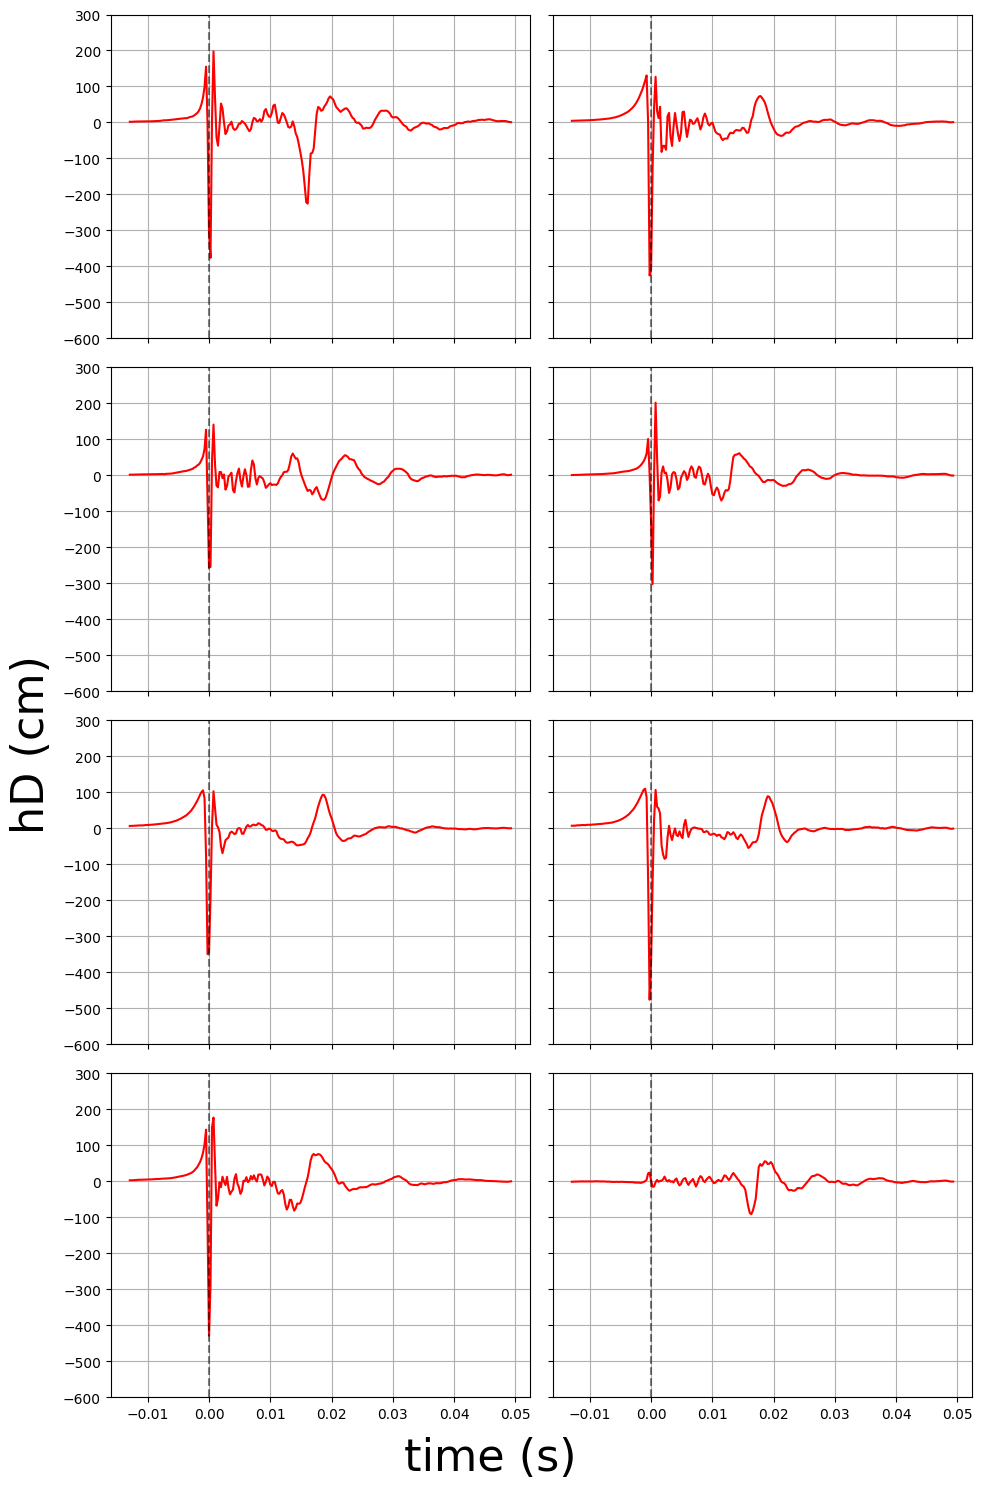

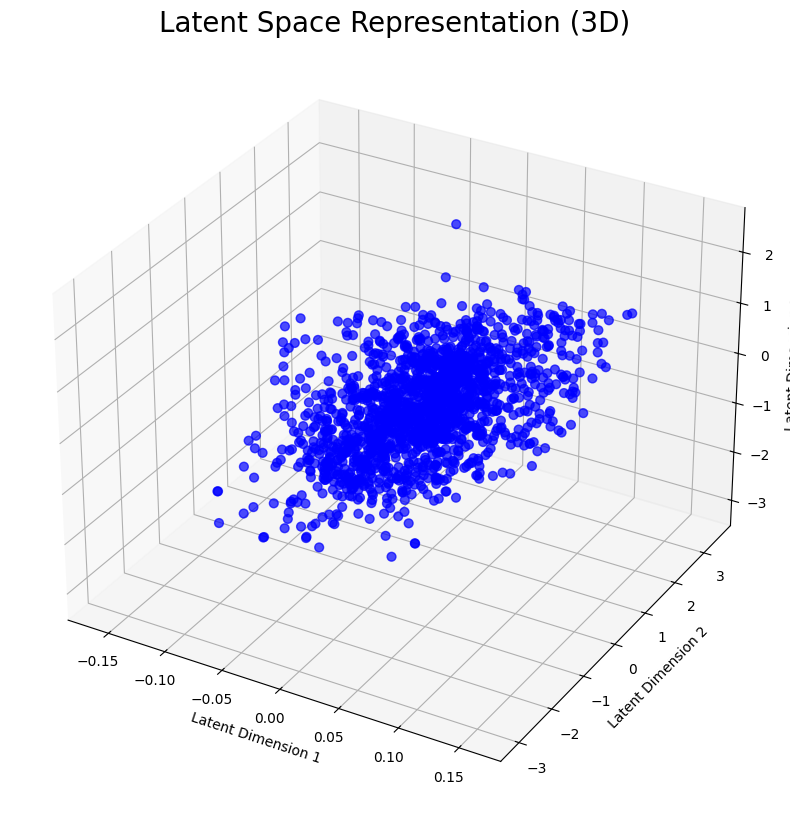

Epochs:  94%|█████████▍| 241/256 [07:09<00:27,  1.86s/it]

Epoch 241/256 | Train Loss: 24.8448 | Val Loss: 24.7531


Epochs:  95%|█████████▍| 242/256 [07:10<00:24,  1.78s/it]

Epoch 242/256 | Train Loss: 25.4322 | Val Loss: 24.9664


Epochs:  95%|█████████▍| 243/256 [07:12<00:22,  1.73s/it]

Epoch 243/256 | Train Loss: 24.9098 | Val Loss: 25.1696


Epochs:  95%|█████████▌| 244/256 [07:14<00:20,  1.70s/it]

Epoch 244/256 | Train Loss: 24.6783 | Val Loss: 24.4226


Epochs:  96%|█████████▌| 245/256 [07:15<00:18,  1.71s/it]

Epoch 245/256 | Train Loss: 24.9288 | Val Loss: 24.7044


Epochs:  96%|█████████▌| 246/256 [07:17<00:16,  1.67s/it]

Epoch 246/256 | Train Loss: 25.0846 | Val Loss: 25.2350


Epochs:  96%|█████████▋| 247/256 [07:19<00:15,  1.68s/it]

Epoch 247/256 | Train Loss: 24.7739 | Val Loss: 24.2971


Epochs:  97%|█████████▋| 248/256 [07:20<00:13,  1.72s/it]

Epoch 248/256 | Train Loss: 24.7050 | Val Loss: 24.4253


Epochs:  97%|█████████▋| 249/256 [07:22<00:11,  1.71s/it]

Epoch 249/256 | Train Loss: 24.9277 | Val Loss: 24.6862


Epochs:  98%|█████████▊| 250/256 [07:24<00:10,  1.67s/it]

Epoch 250/256 | Train Loss: 24.5825 | Val Loss: 24.3713


Epochs:  98%|█████████▊| 251/256 [07:25<00:08,  1.64s/it]

Epoch 251/256 | Train Loss: 24.6543 | Val Loss: 24.3258


Epochs:  98%|█████████▊| 252/256 [07:27<00:06,  1.62s/it]

Epoch 252/256 | Train Loss: 24.7187 | Val Loss: 24.4832


Epochs:  99%|█████████▉| 253/256 [07:28<00:04,  1.60s/it]

Epoch 253/256 | Train Loss: 24.7086 | Val Loss: 24.4669


Epochs:  99%|█████████▉| 254/256 [07:30<00:03,  1.63s/it]

Epoch 254/256 | Train Loss: 24.6090 | Val Loss: 24.6915


Epochs: 100%|█████████▉| 255/256 [07:32<00:01,  1.61s/it]

Epoch 255/256 | Train Loss: 24.7687 | Val Loss: 24.3284
Epoch 256/256 | Train Loss: 24.4765 | Val Loss: 24.3427


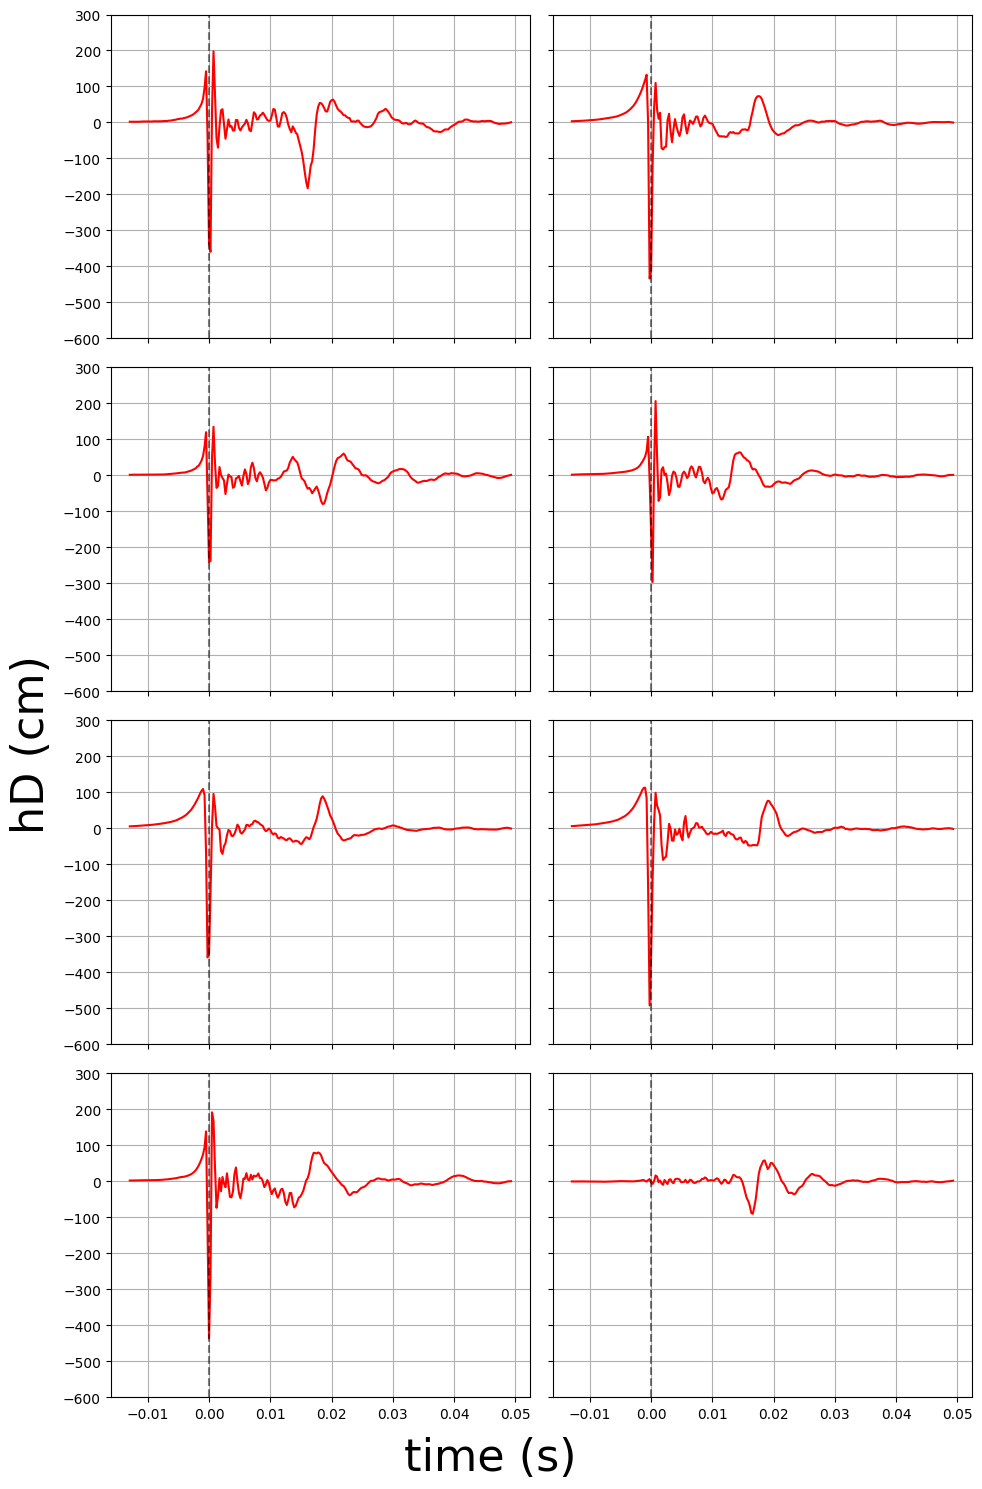

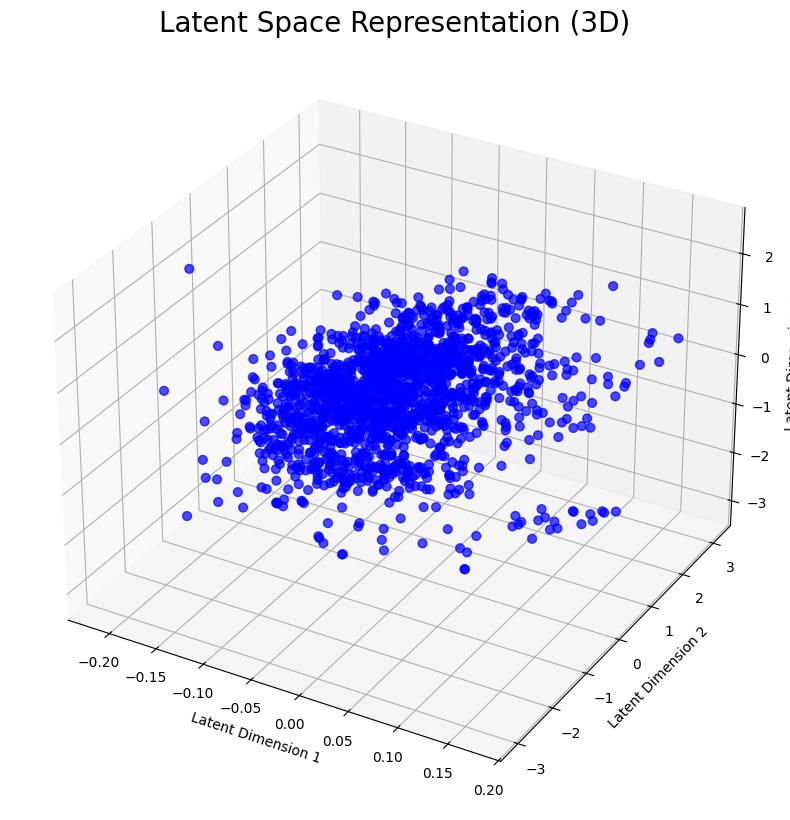

Epochs: 100%|██████████| 256/256 [07:34<00:00,  1.78s/it]

Training Time: 7.58min
Saved VAE model to outdir/generator_weights.pt


In [7]:
vae_trainer = Trainer(toy=toy)
vae_trainer.train()

### Display Results

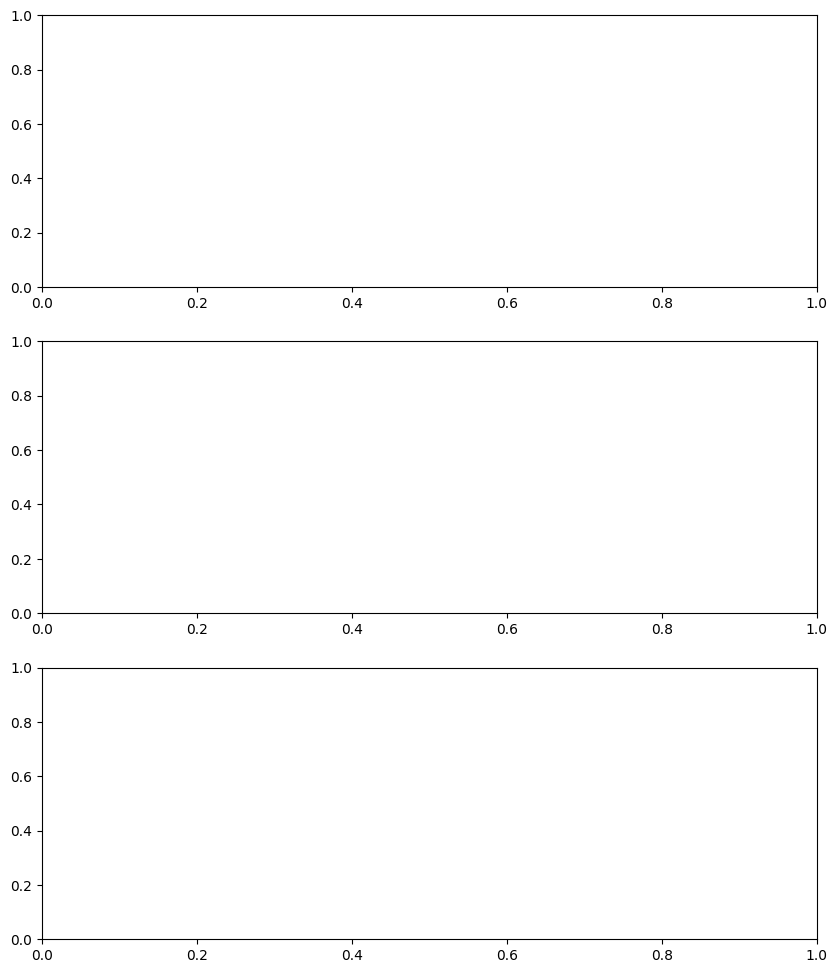

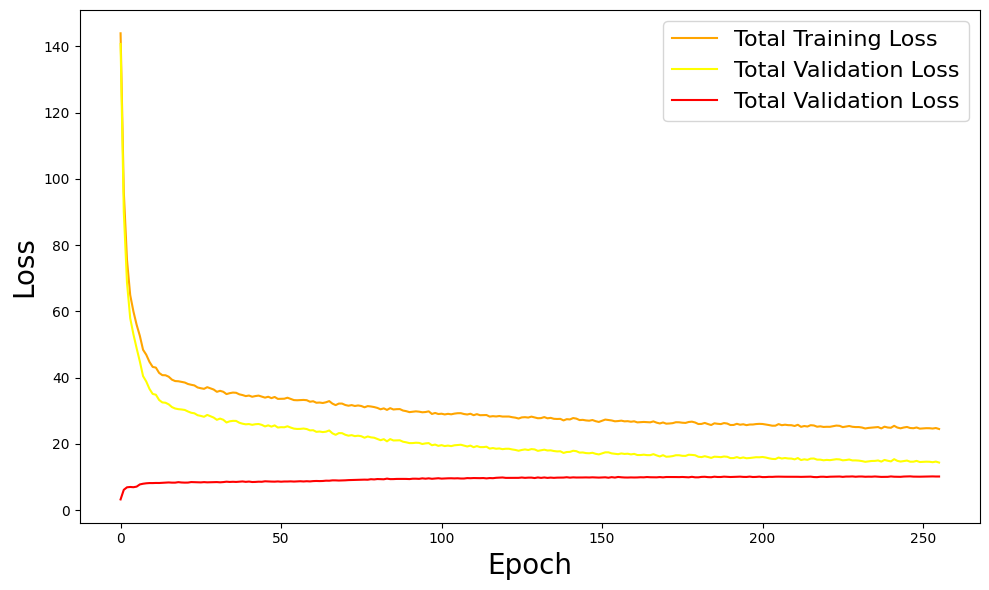

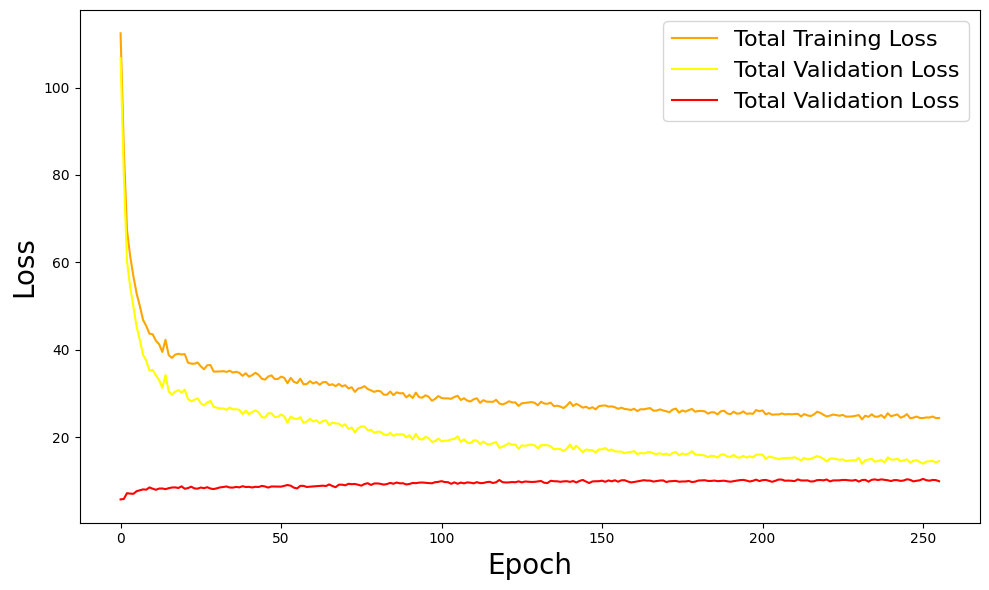

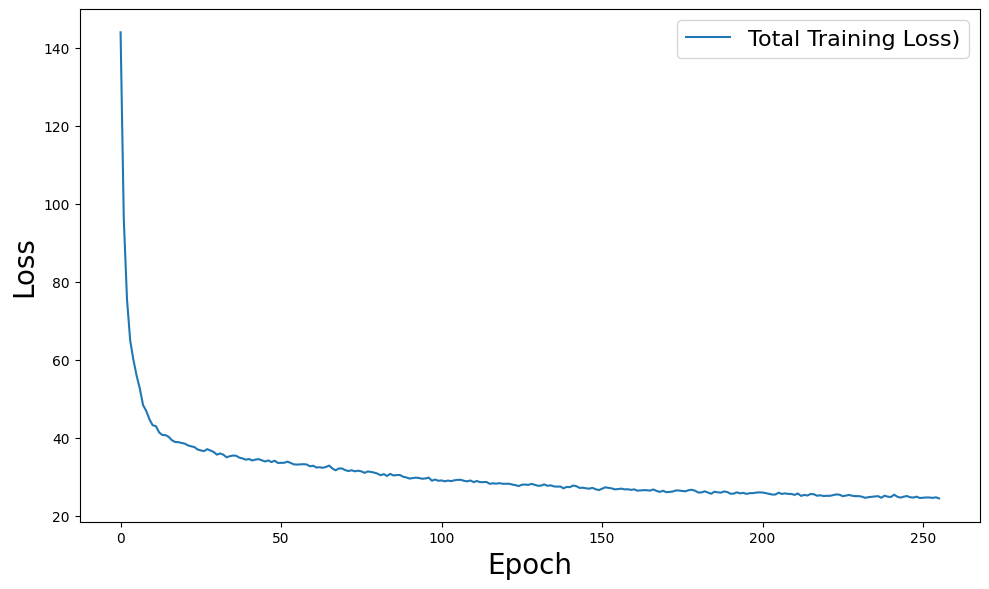

In [8]:
vae_trainer.display_results()

Execution Time: 0.21014666557312012 seconds


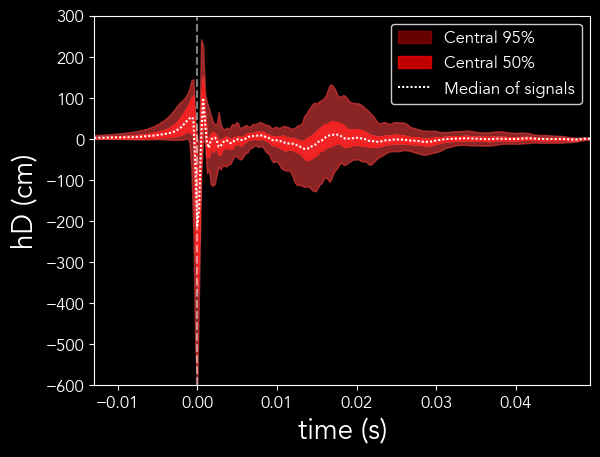

In [ ]:
vae_trainer.plot_generated_signal_distribution(background="black", font_family="sans-serif", font_name="Avenir", fname="plots/ccsn_generated_signal_distribution.svg")

/var/folders/qy/p5knypnd54x1dfyxqbs0175r0000gn/T/ipykernel_88971/2104222922.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x).to(DEVICE)


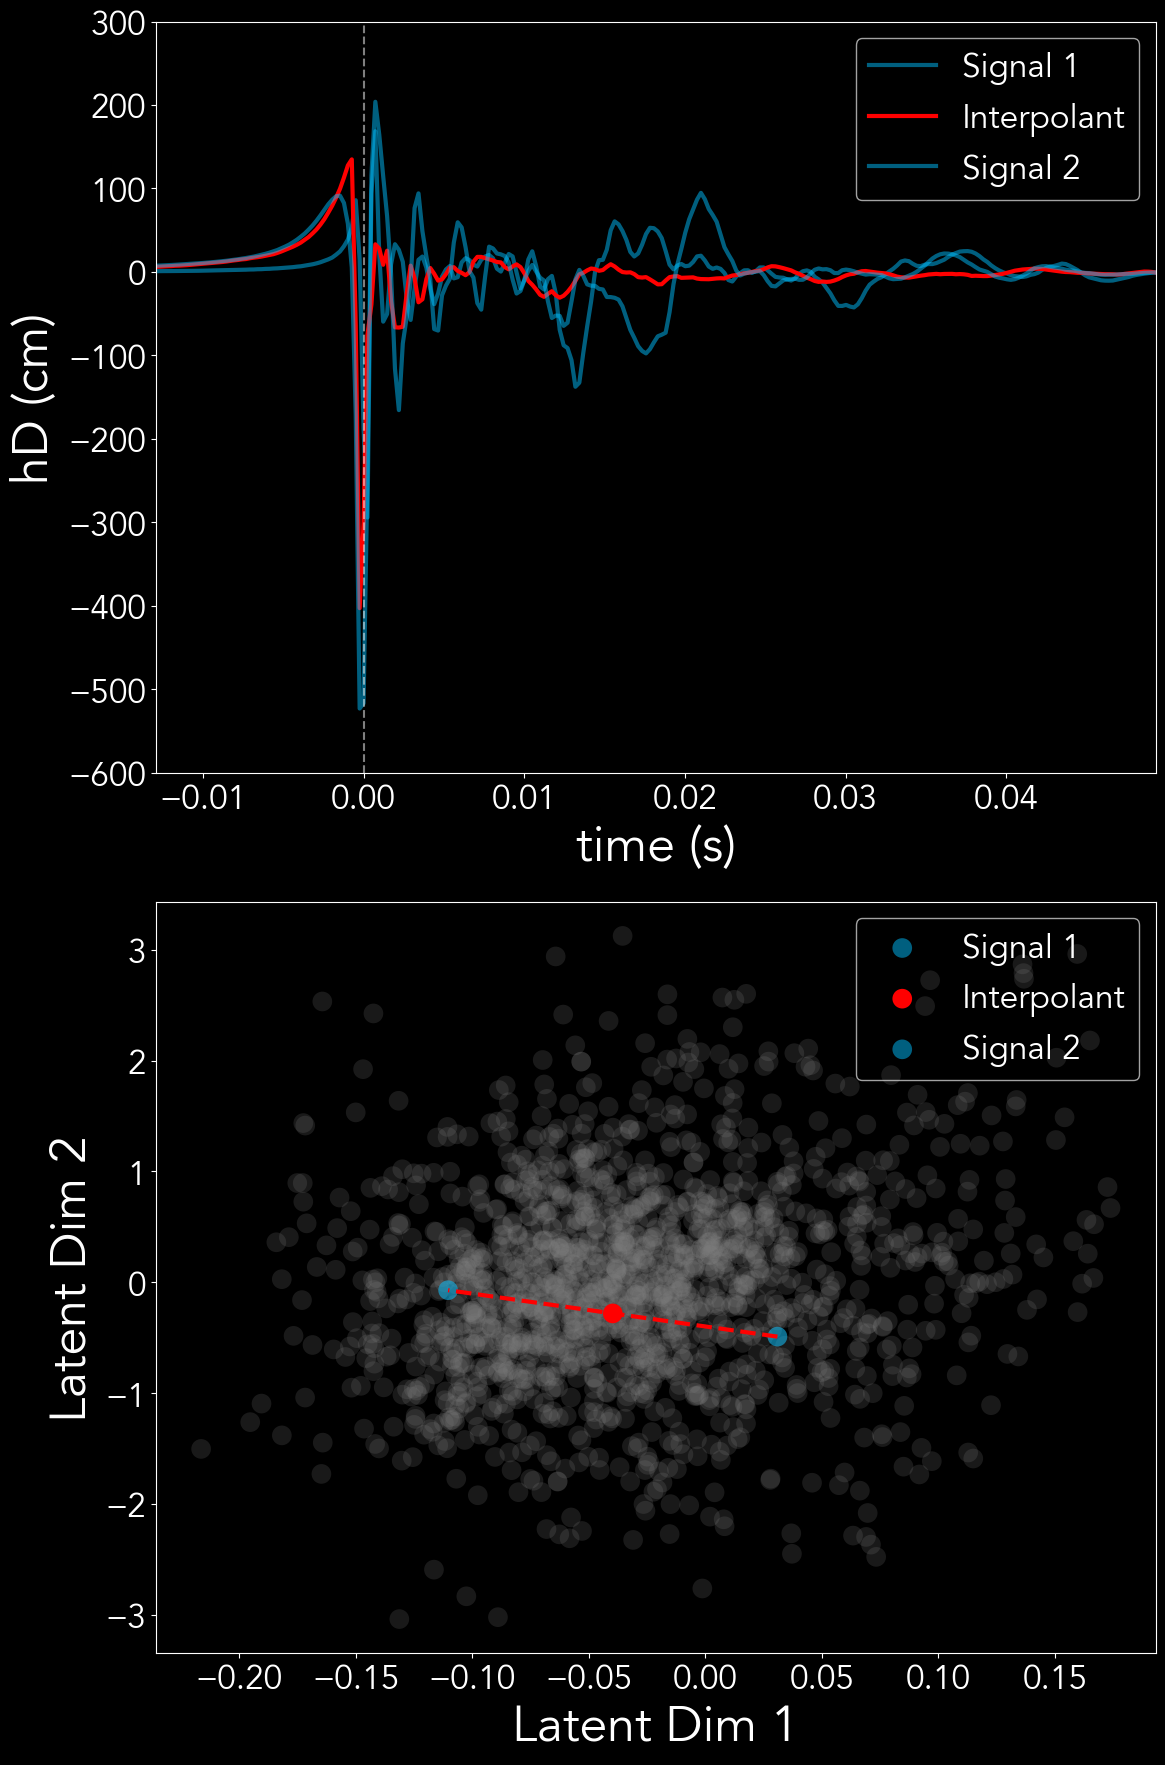

In [ ]:
def plot_latent_morph_side_by_side(
    model,
    signal_1: torch.Tensor,
    signal_2: torch.Tensor,
    max_value: float,
    train_dataset,
    steps=10,
    background="black",
    font_family="sans-serif",
    font_name="Avenir",
    fname="plots/latent_morph_side_by_side.svg"
):
    model.eval()
    with torch.no_grad():
        # Encode signals
        mean_1, _ = model.encoder(signal_1)
        mean_2, _ = model.encoder(signal_2)

        # Get middle latent point
        alpha = 0.5
        mean_mid = mean_1 * (1 - alpha) + mean_2 * alpha
        signal_mid = model.decoder(mean_mid).cpu().detach().numpy().flatten() * max_value

        # Reconstruct signals
        signal_1_np = signal_1.cpu().detach().numpy().flatten() * max_value
        signal_2_np = signal_2.cpu().detach().numpy().flatten() * max_value

        # X-axis
        x_vals = [i / 4096 for i in range(0, 256)]
        x_vals = [x - (53 / 4096) for x in x_vals]

        # Posterior means for background latent scatter
        all_means = []
        for x, _ in train_dataset:
            x = torch.tensor(x).to(DEVICE)
            mean, _ = model.encoder(x)
            all_means.append(mean.cpu().numpy())
        all_means = np.concatenate(all_means, axis=0)

    if background == "black":
        plt.style.use('dark_background')
        plt.rcParams['axes.facecolor'] = 'black'
        plt.rcParams['figure.facecolor'] = 'black'
        plt.rcParams['savefig.facecolor'] = 'black'
        plt.rcParams['text.color'] = 'white'
        plt.rcParams['axes.labelcolor'] = 'white'
        plt.rcParams['xtick.color'] = 'white'
        plt.rcParams['ytick.color'] = 'white'
        grid_color = 'white'
        vline_color = 'white'
    plt.rcParams['font.family'] = font_family
    plt.rcParams['font.sans-serif'] = font_name
    plt.rcParams['font.size'] = 18

    mean_1 = mean_1.squeeze()
    mean_2 = mean_2.squeeze()
    mean_mid = mean_mid.squeeze()

    # Set up figure
    fig = plt.figure(figsize=(12, 18))

    ax1 = fig.add_subplot(2, 1, 1)
    # plot all the signals on the plot
    ax1.plot(x_vals, signal_1_np, color='deepskyblue', label='Signal 1', alpha=0.5, linewidth=3)
    ax1.plot(x_vals, signal_mid, color='red', label='Interpolant', linewidth=3)
    ax1.plot(x_vals, signal_2_np, color='deepskyblue', label='Signal 2', alpha=0.5, linewidth=3)
    plt.axvline(x=0, color=vline_color, linestyle='dashed', alpha=0.5)
    ax1.set_ylim(-600, 300)
    ax1.set_xlim(left=x_vals[0], right=x_vals[-1])
    ax1.set_xlabel("time (s)", fontsize=36)
    ax1.set_ylabel("hD (cm)", fontsize=36)
    ax1.tick_params(axis='both', which='major', labelsize=24)    

    ax1.legend(loc='upper right', fontsize=24, facecolor='none')

    # create the latent plot, but only use the first 2 dimensions
    ax2 = fig.add_subplot(2, 1, 2)
    ax2.scatter(all_means[:, 0], all_means[:, 1], alpha=0.2, color='gray', edgecolors='none', s=200)
    ax2.plot(
        [mean_1[0].cpu(), mean_2[0].cpu()],
        [mean_1[1].cpu(), mean_2[1].cpu()],
        color='red', linestyle='--', linewidth=3
    )
    ax2.scatter(mean_1[0].cpu(), mean_1[1].cpu(), color='deepskyblue', label="Signal 1", alpha=0.5, edgecolors='none', s=200)
    ax2.scatter(mean_mid[0].cpu(), mean_mid[1].cpu(), color='red', label="Interpolant", edgecolors='none', s=200)
    ax2.scatter(mean_2[0].cpu(), mean_2[1].cpu(), color='deepskyblue', label="Signal 2", alpha=0.5, edgecolors='none', s=200)
    ax2.set_xlabel('Latent Dim 1', fontsize=36)
    ax2.set_ylabel('Latent Dim 2', fontsize=36)
    ax2.tick_params(axis='both', which='major', labelsize=24)
    ax2.legend(loc='upper right', fontsize=24, facecolor='none')

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2)
    plt.savefig(fname=fname, dpi=300, bbox_inches='tight', transparent=True)

ccsn_signal_1 = ccsn_dataset.__getitem__(800)[0]
ccsn_signal_2 = ccsn_dataset.__getitem__(600)[0]

plot_latent_morph_side_by_side(
    vae_trainer.vae,
    signal_1=ccsn_signal_1,
    signal_2=ccsn_signal_2,
    max_value=vae_trainer.training_dataset.max_strain,
    train_dataset=CCSNData(),
    steps=1
)